# **MINI CHALLENGE**


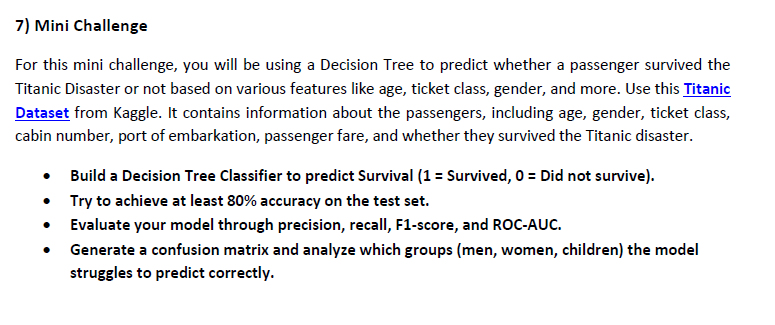

# Step 1: Importing the necessary libraries

In [ ]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from scipy import stats
from statsmodels.tools.eval_measures import rmse
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D

# Plot styles to set aesthetic preferences for your visualizations.
sns.set()
plt.style.use('ggplot')

# Step 2: Loading data

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# uploading the training and testing dataset from drive
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lab06/dataset/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lab06/dataset/test.csv')
validation_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lab06/dataset/gender_submission.csv')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
validation_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Step 3: Understanding the data

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
validation_df.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [ ]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
# the unique values of columnsSurvived, PClass, Sex, SipSp, Parch and Embarked

columns_to_check = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_check:
  print(f"Unique values for {column}: {train_df[column].unique()}")

Unique values for Survived: [0 1]
Unique values for Pclass: [3 1 2]
Unique values for Sex: ['male' 'female']
Unique values for SibSp: [1 0 3 4 2 5 8]
Unique values for Parch: [0 1 2 5 3 4 6]
Unique values for Embarked: ['S' 'C' 'Q' nan]


In [ ]:
# unique values of cabin
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
# checking the unique values of the ticket column
train_df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [ ]:
# printing the Names column unique values

train_df['Name'].duplicated().sum()

0

# Dividing the columns into three categories On the basis of the understanding of the data and datatypes of each column


1.   **Numerical Data:**
      * PassengerId
      * Fare
      * Age

2.   **Categorical Data:**
      * Pclass
      * Sex
      * SibSp
      * Parch
      * Embarked
      * Survived

3.   **Mixed Data:**
      * Name
      * Ticket
      * Cabin



# Step 4: Univariate Analysis
Univariate analysis focuses on analyzing each feature in the dataset independently.

* **Distribution analysis:** The distribution of each feature is examined to identify its shape, central tendency, and dispersion

* **Identifying potential issues:** Univariate analysis helps in identifying potential problems with the data such as outliers, skewness and missing values


#### Steps of doing Univariate Analysis on Numerical columns

**Descriptive Statistics:** Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

**Visualizations:** Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

**Identifying Outliers:** Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

**Skewness:** Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

**Conclusion:** Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

#### **Numerical Variables**

##### **Fare**
**Summary Of Analysis of Fare**
* median 14.4
* not normal
* positively skewed
* include outliers
* no negative values of fares

In [ ]:
train_df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


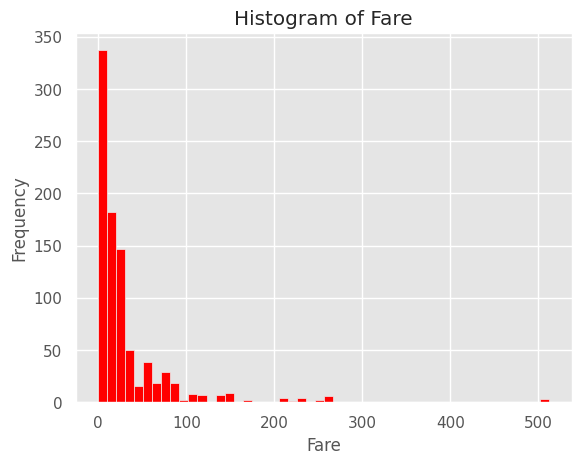

In [ ]:
# histogram
train_df['Fare'].plot(kind='hist', title='Histogram of Fare', color='red', bins= 50)
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

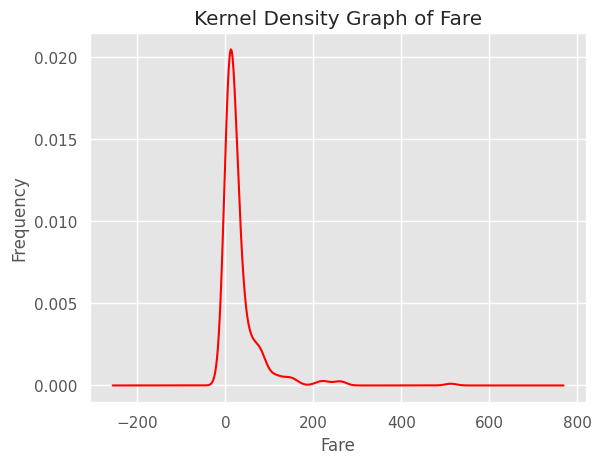

In [ ]:
# drawing the kernel density graph
train_df['Fare'].plot(kind='kde', title='Kernel Density Graph of Fare', color='red')
plt.title('Kernel Density Graph of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# checking the skewness
train_df['Fare'].skew()

4.787316519674893

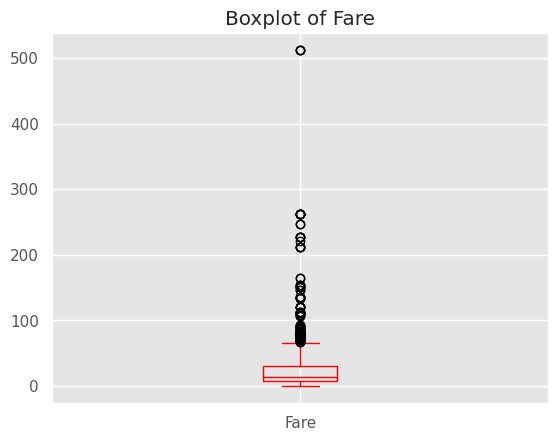

In [ ]:
# boxplot
train_df['Fare'].plot(kind='box', title='Boxplot of Fare', color='red')
plt.title('Boxplot of Fare')
plt.show()

In [ ]:
# number of negative values of fare in the Fare column
train_df[train_df['Fare'] < 0].shape

(0, 12)

##### **Age**
**Summary Of Analysis of Fare**
* median 28
* almost normal
* minor skewness towards the positive side
* include outliers
* no negative values in age column

In [ ]:
# describing the column
train_df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


Text(0, 0.5, 'Frequency')

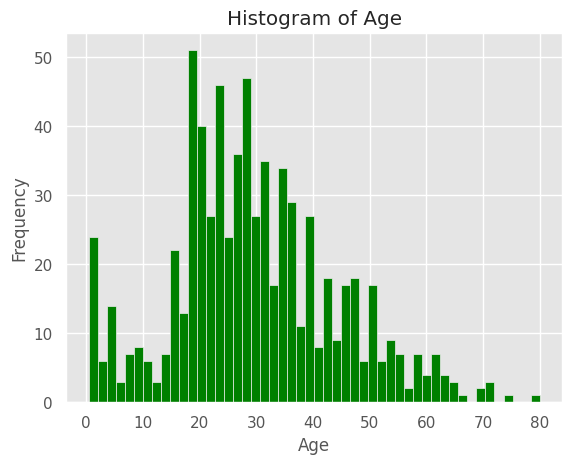

In [ ]:
# drawing the histogram
train_df['Age'].plot(kind='hist', title='Histogram of Age', color='green', bins= 50)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

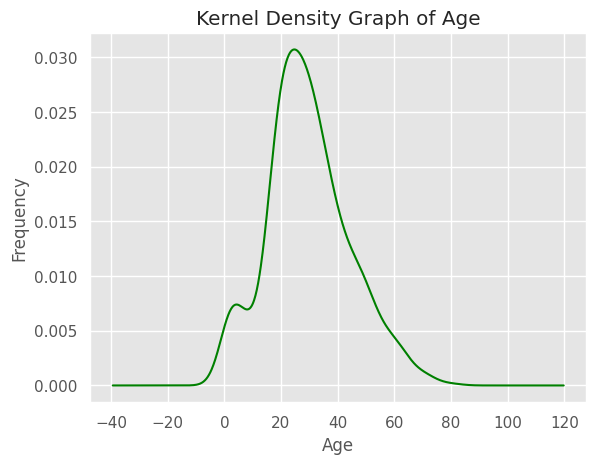

In [ ]:
# KDE plot
train_df['Age'].plot(kind='kde', title='Kernel Density Graph of Age', color='green')
plt.title('Kernel Density Graph of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [ ]:
# checking the skewness
train_df['Age'].skew()

0.38910778230082704

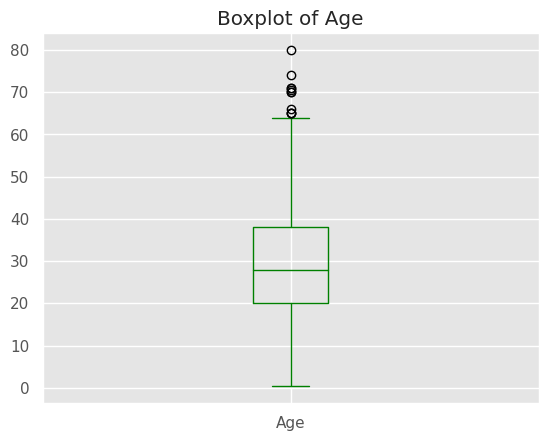

In [ ]:
# draawing the boxplot for observing the outliers
train_df['Age'].plot(kind='box', title='Boxplot of Age', color='green')
plt.title('Boxplot of Age')
plt.show()

In [ ]:
# checking for the negative values of the age
train_df[train_df['Age'] < 0].shape

(0, 12)

#### **Categorical Variables**

##### **PClass**

**Summary of analysis**
* Ist Class: 24.2%
* Second Class: 20.7%
* Third Class: 55.1%
* no missing values

In [ ]:
# counting the number of times the unique values encountered
train_df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


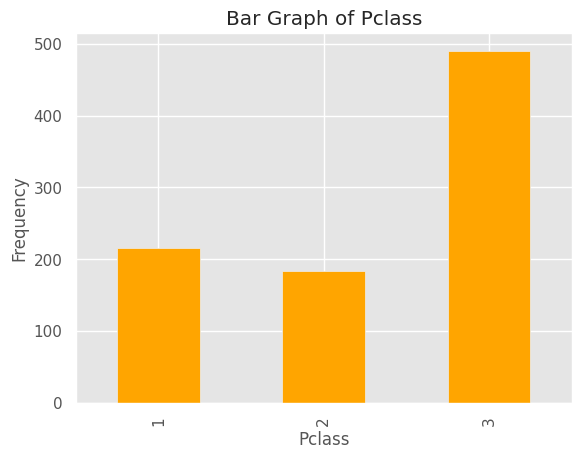

In [ ]:
# drawing the bar graph
train_df['Pclass'].value_counts().sort_index().plot(kind='bar', title='Bar Graph of Pclass', color='orange')
plt.title('Bar Graph of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.show()

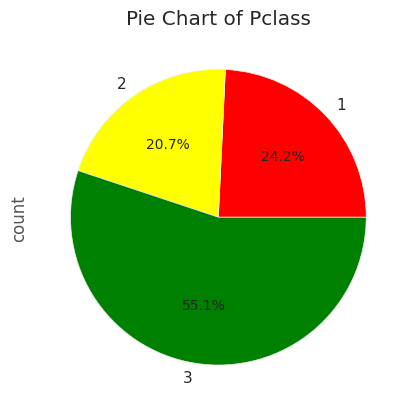

In [ ]:
# drawing the pie chart
train_df['Pclass'].value_counts().sort_index().plot(kind='pie', title='Pie Chart of Pclass', autopct='%1.1f%%', colors=['red', 'yellow', 'green'])
plt.title('Pie Chart of Pclass')
plt.show()

In [ ]:
# checking the number of null in PClass
train_df['Pclass'].isnull().sum()

0

##### **Sex**

**Summary of analysis**
* Males: 64.8%
* Females: 35.2%
* no missing values

In [ ]:
# describe the sex column
train_df['Sex'].describe()

,Sex
count,891
unique,2
top,male
freq,577


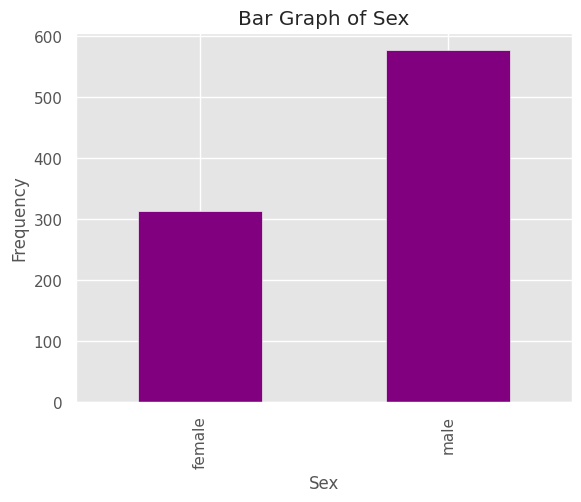

In [ ]:
# bar graph
train_df['Sex'].value_counts().sort_index().plot(kind='bar', title='Bar Graph of Sex', color='purple')
plt.title('Bar Graph of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

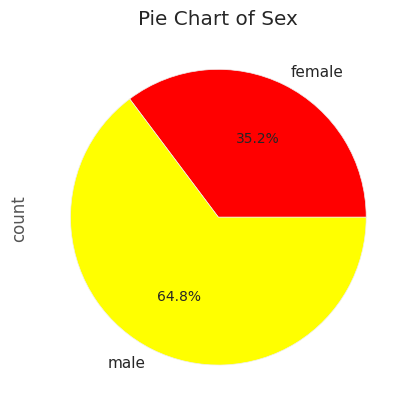

In [ ]:
# pie chart
train_df['Sex'].value_counts().sort_index().plot(kind='pie', title='Pie Chart of Sex', autopct='%1.1f%%', colors=['red', 'yellow'])
plt.title('Pie Chart of Sex')
plt.show()

In [ ]:
# checking for the missing values
train_df['Sex'].isnull().sum()

0

##### **Sibsp**

**Summary of analysis**
**Percentages**
* 0	--- 68.237935
* 1	--- 23.456790
* 2	--- 3.142536
* 4	--- 2.020202
* 3	--- 1.795735
* 8	--- 0.785634
* 5	--- 0.561167
* no missing values

In [ ]:
# describing the columnb
train_df['SibSp'].describe()

,SibSp
count,891.000000
mean,0.523008
std,1.102743
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


Text(0.5, 0, 'SibSp')

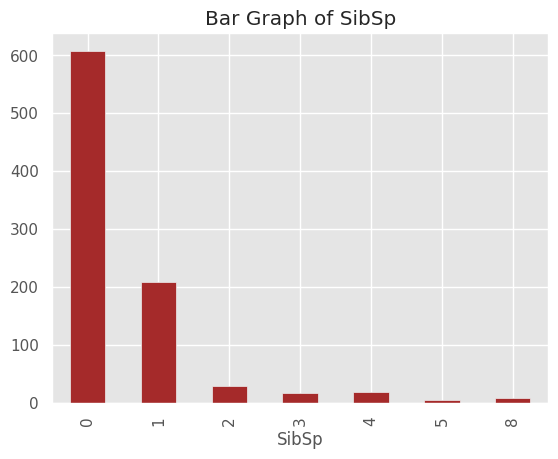

In [ ]:
# bar graph
train_df['SibSp'].value_counts().sort_index().plot(kind='bar', title='Bar Graph of SibSp', color='brown')
plt.title('Bar Graph of SibSp')
plt.xlabel('SibSp')

Text(0.5, 1.0, 'Pie Chart of SibSp')

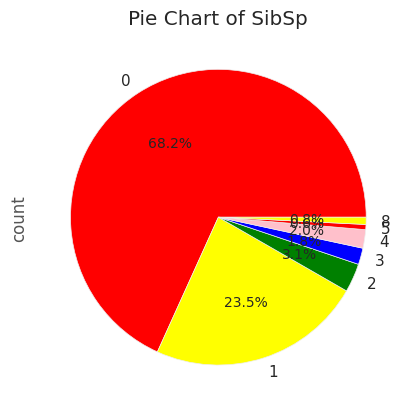

In [ ]:
#  pie chart
train_df['SibSp'].value_counts().sort_index().plot(kind='pie', title='Pie Chart of SibSp', autopct='%1.1f%%', colors=['red', 'yellow', 'green', 'blue', 'pink'])
plt.title('Pie Chart of SibSp')

In [ ]:
# missing values checkign
train_df['SibSp'].isnull().sum()

0

In [ ]:
# printing the percentages of the categories
train_df['SibSp'].value_counts(normalize=True) * 100


,proportion
SibSp,
0,68.237935
1,23.456790
2,3.142536
4,2.020202
3,1.795735
8,0.785634
5,0.561167


##### **Parch**

**Summary of analysis**

**Percentages**
* 0	--- 76.094276
* 1	--- 13.243547
* 2	--- 8.978676
* 5	--- 0.561167
* 3	--- 0.561167
* 4	--- 0.448934
* 6	--- 0.112233
* no missing values

In [ ]:
# describing the column
train_df['Parch'].describe()

,Parch
count,891.000000
mean,0.381594
std,0.806057
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6.000000


Text(0.5, 0, 'Parch')

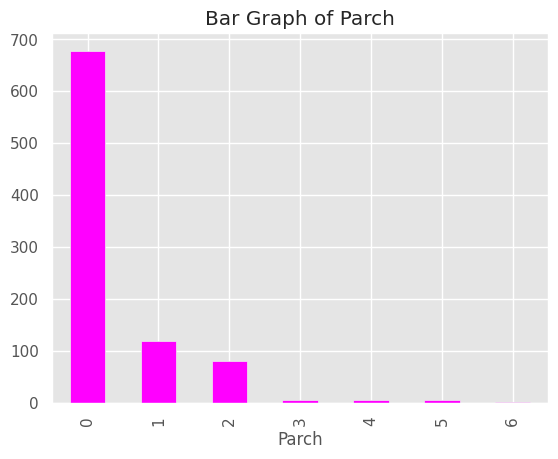

In [ ]:
# bar graph
train_df['Parch'].value_counts().sort_index().plot(kind='bar', title='Bar Graph of Parch', color='magenta')
plt.title('Bar Graph of Parch')
plt.xlabel('Parch')

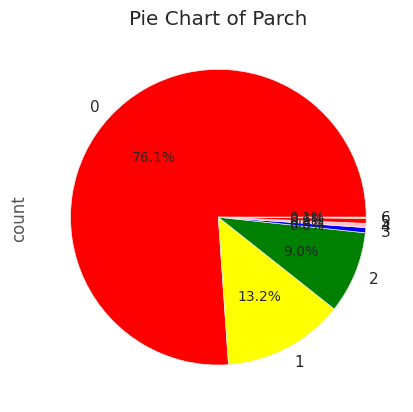

In [ ]:
#  pie chart
train_df['Parch'].value_counts().sort_index().plot(kind='pie', title='Pie Chart of Parch', autopct='%1.1f%%', colors=['red', 'yellow', 'green', 'blue', 'pink'])
plt.title('Pie Chart of Parch')
plt.show()

In [ ]:
# missing values checkign
train_df['Parch'].isnull().sum()

0

In [ ]:
# printing the percentages of all valeus
train_df['Parch'].value_counts(normalize=True) * 100

,proportion
Parch,
0,76.094276
1,13.243547
2,8.978676
5,0.561167
3,0.561167
4,0.448934
6,0.112233


##### **Embarked**

**Summary of analysis**
* S --- 72.4%
* Q --- 8.7%
* C --- 18.9%
* two rows containing missing value
* missing value percentage is 0.2244%
* after completing the analysis, I will consider to drop these two rows

In [ ]:
# describing the column
train_df['Embarked'].describe()

,Embarked
count,889
unique,3
top,S
freq,644


Text(0.5, 0, 'Embarked')

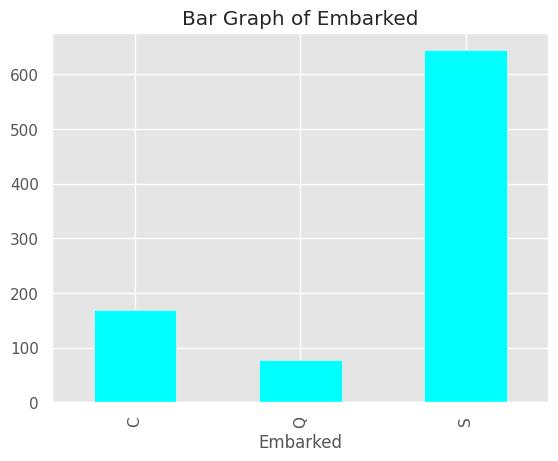

In [ ]:
# bar graph
train_df['Embarked'].value_counts().sort_index().plot(kind='bar', title='Bar Graph of Embarked', color='cyan')
plt.title('Bar Graph of Embarked')
plt.xlabel('Embarked')

Text(0.5, 1.0, 'Pie Chart of Embarked')

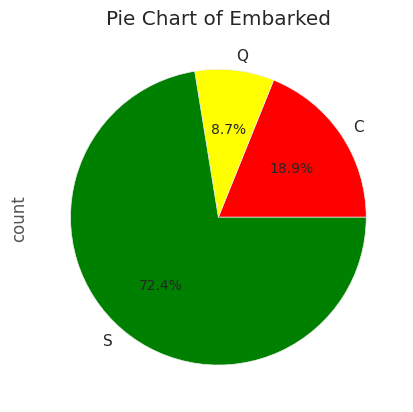

In [ ]:
#  pie chart
train_df['Embarked'].value_counts().sort_index().plot(kind='pie', title='Pie Chart of Embarked', autopct='%1.1f%%', colors=['red', 'yellow', 'green'])
plt.title('Pie Chart of Embarked')

In [ ]:
# missing values checkign
train_df['Embarked'].isnull().sum()


2

In [ ]:
# print the rows with missing values
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
# calculate the percentage of missing values rows
missing_percentage = (train_df['Embarked'].isnull().sum() / len(train_df)) * 100
print(missing_percentage)

0.22446689113355783


##### **Survived**

**Summary of analysis**
* Died --- 61.5%
* Survived --- 38.4%
* no missing values

In [ ]:
# describing the column
train_df['Survived'].describe()

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Text(0.5, 0, 'Survived')

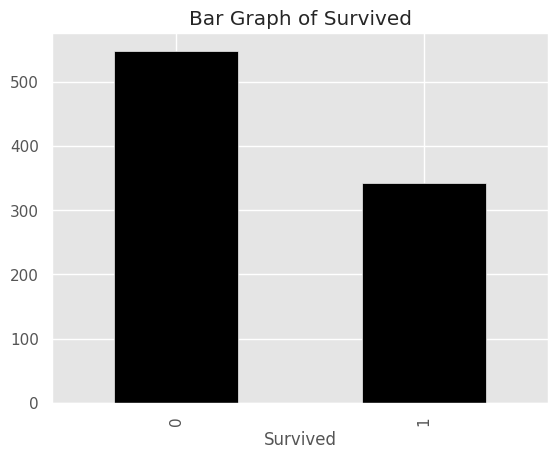

In [ ]:
# bar graph
train_df['Survived'].value_counts().sort_index().plot(kind='bar', title='Bar Graph of Survived', color='black')
plt.title('Bar Graph of Survived')
plt.xlabel('Survived')

Text(0.5, 1.0, 'Pie Chart of Survived')

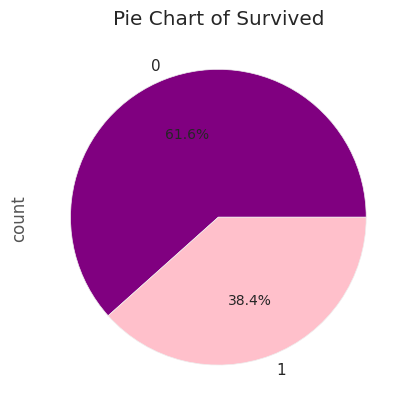

In [ ]:
#  pie chart
train_df['Survived'].value_counts().sort_index().plot(kind='pie', title='Pie Chart of Survived', autopct='%1.1f%%', colors=['purple', 'pink'])
plt.title('Pie Chart of Survived')

In [ ]:
# missing values checkign
train_df['Survived'].isnull().sum()

0

# Step 5: Bivariate Analysis

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots. Scatterplots are not as much beneficial<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps


#### **First Type: Numerical-Numerical**

finding the relationship of one numerical column with all other numerical columns

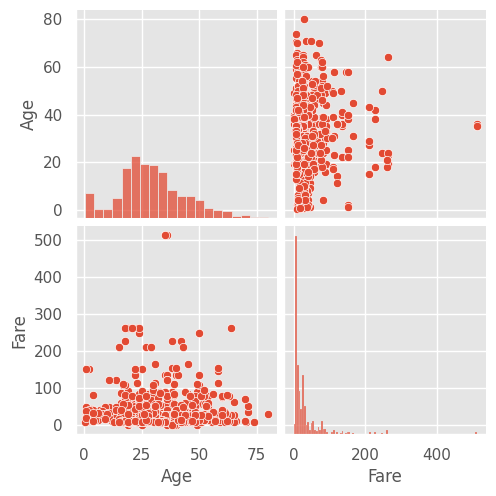

In [ ]:
# finding the relationship of one numerical column with all other numerical columns using scatter plot
numerical_columns = ['Age', 'Fare']
sns.pairplot(train_df[numerical_columns])
plt.show()


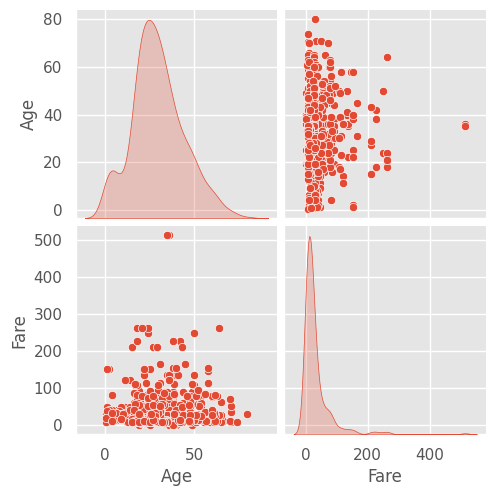

In [ ]:
# finding the relationship of one numerical column with all other numerical columns using scatter plot
numerical_columns = ['Age', 'Fare']
sns.pairplot(train_df[numerical_columns], diag_kind='kde')
plt.show()

#### **Second Type: Numerical-Categorical**

Relationship of Fare with all categorical columns

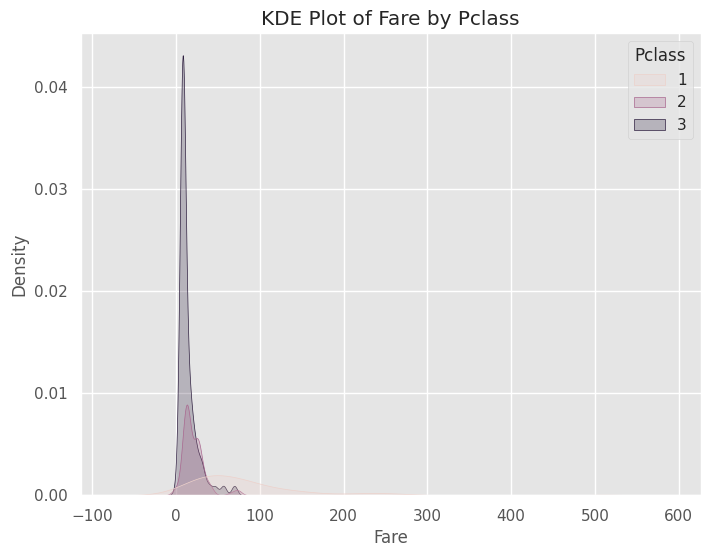

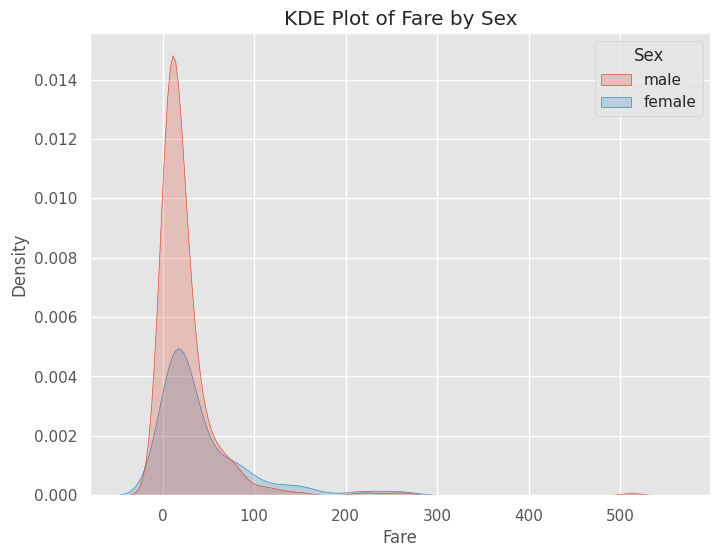

<ipython-input-87-1c64c528dc98>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=train_df, x=numerical_column, hue=col, fill=True)


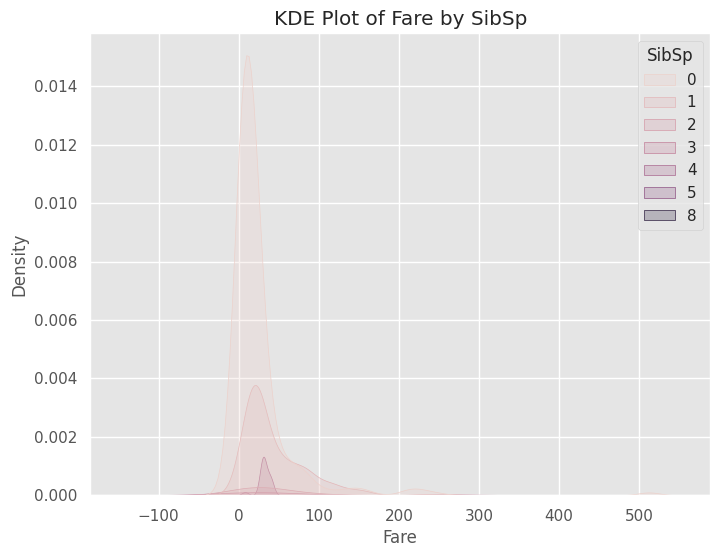

<ipython-input-87-1c64c528dc98>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=train_df, x=numerical_column, hue=col, fill=True)


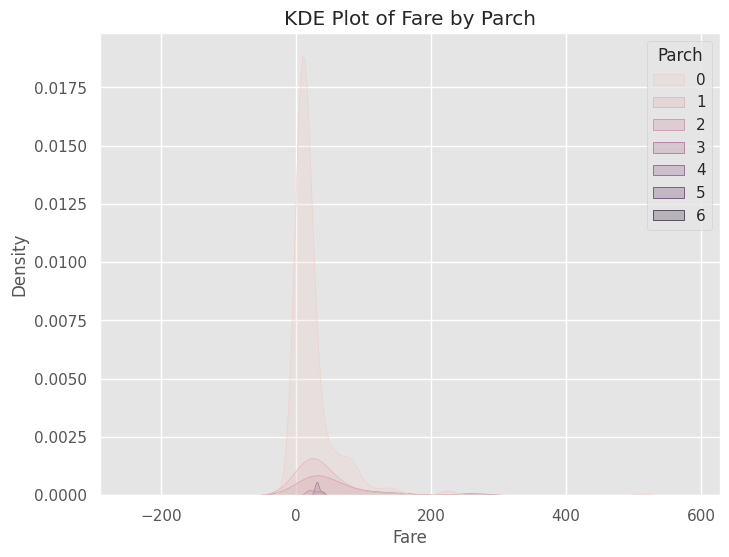

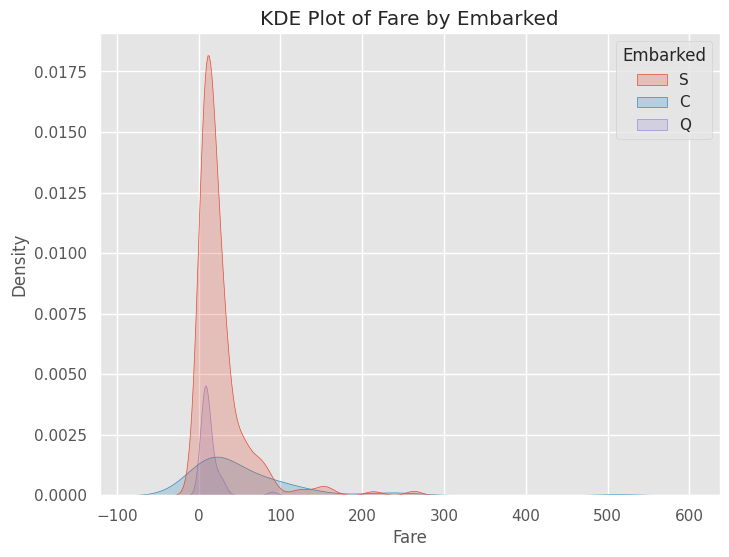

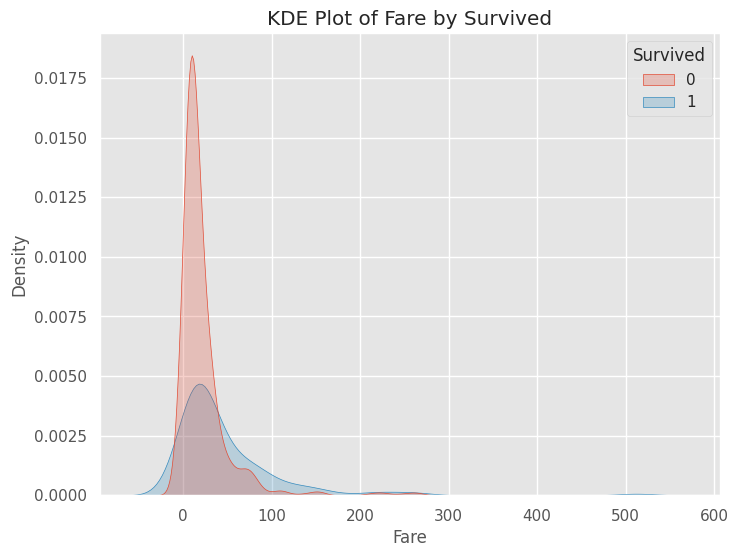

In [ ]:
from typing import Any
# Relationship of Fare with all categorical columns
numerical_column = 'Fare'
categorical_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']

# Create kde plots
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=train_df, x=numerical_column, hue=col, fill=True)
    plt.title(f'KDE Plot of {numerical_column} by {col}')
    plt.xlabel(numerical_column)
    plt.ylabel('Density')
    plt.show()

Relationship of Age with all categorical columns


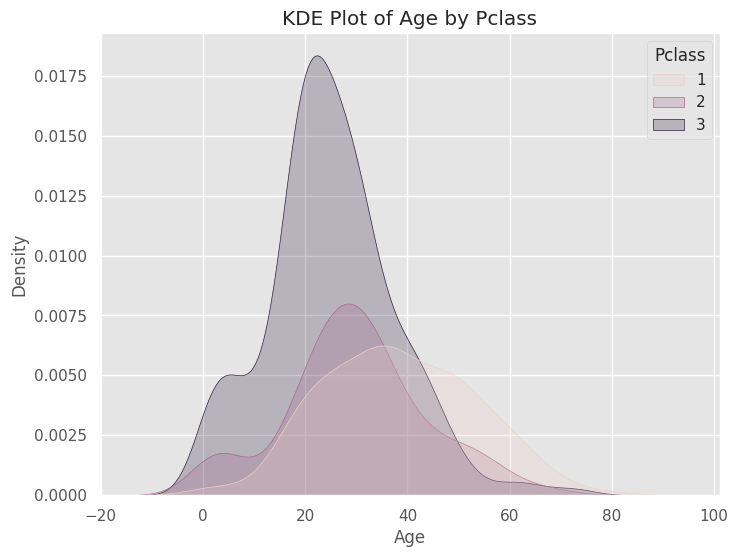

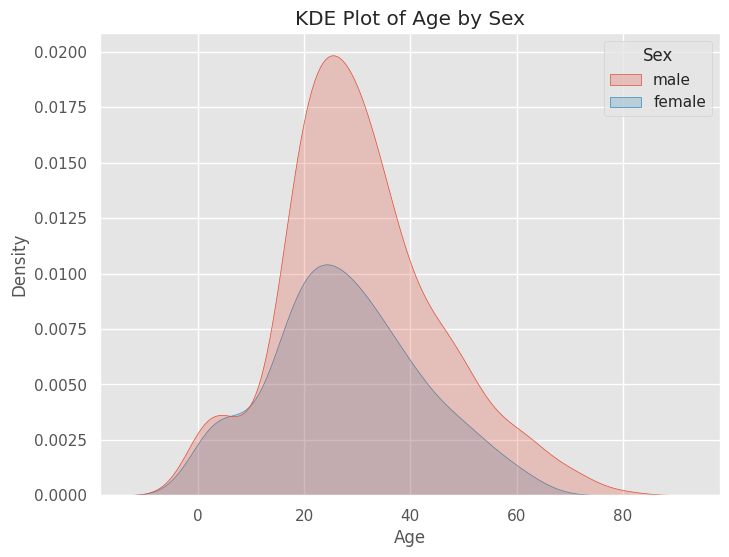

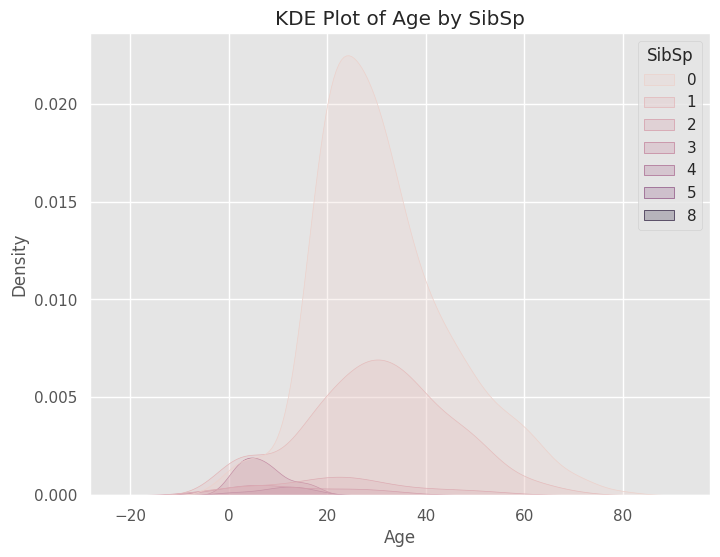

<ipython-input-88-294dd523d961>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=train_df, x=numerical_column, hue=col, fill=True)


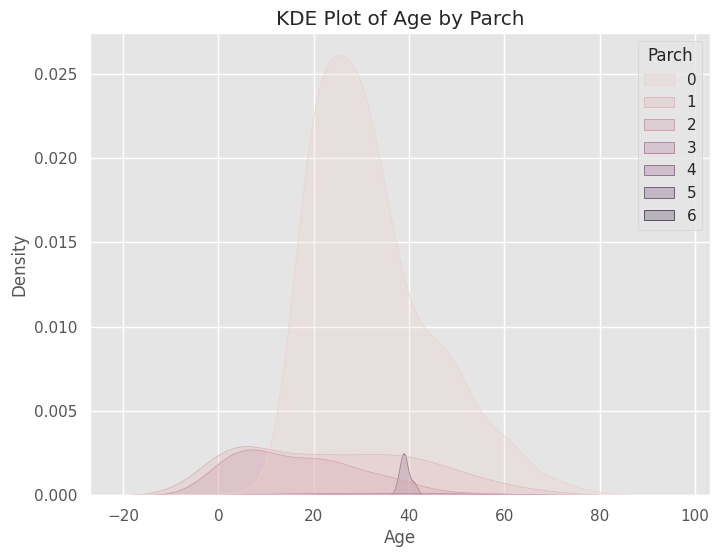

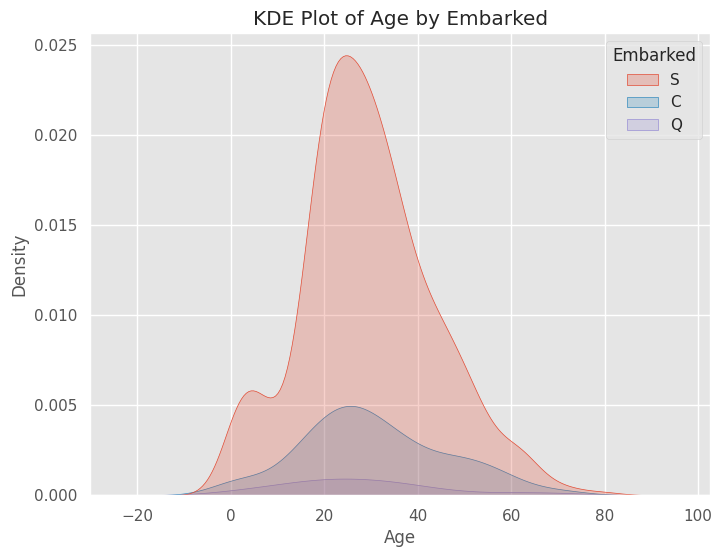

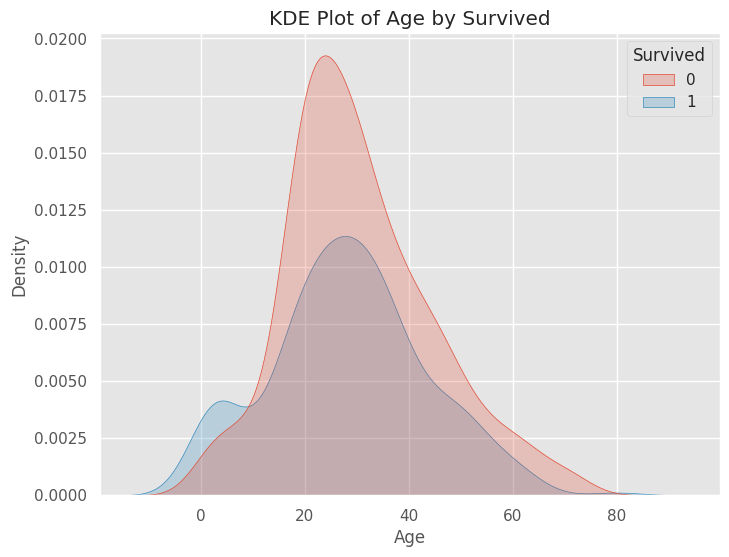

In [ ]:
# Relationship of Age with all categorical columns
numerical_column = 'Age'

for col in categorical_columns:
  plt.figure(figsize=(8, 6))
  sns.kdeplot(data=train_df, x=numerical_column, hue=col, fill=True)
  plt.title(f'KDE Plot of {numerical_column} by {col}')
  plt.xlabel(numerical_column)
  plt.ylabel('Density')
  plt.show()

#### **Third Type: Categorical-Categoricals**

Survived     0     1
Pclass              
1         37.0  63.0
2         52.7  47.3
3         75.8  24.2




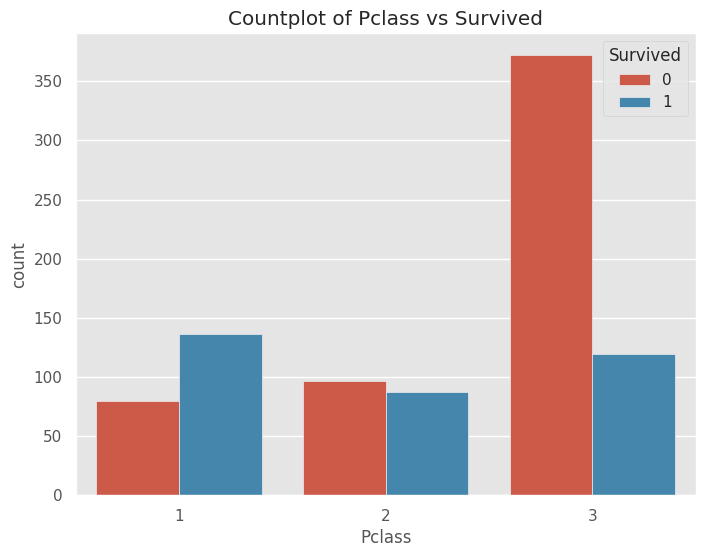

Survived     0     1
Sex                 
female    25.8  74.2
male      81.1  18.9




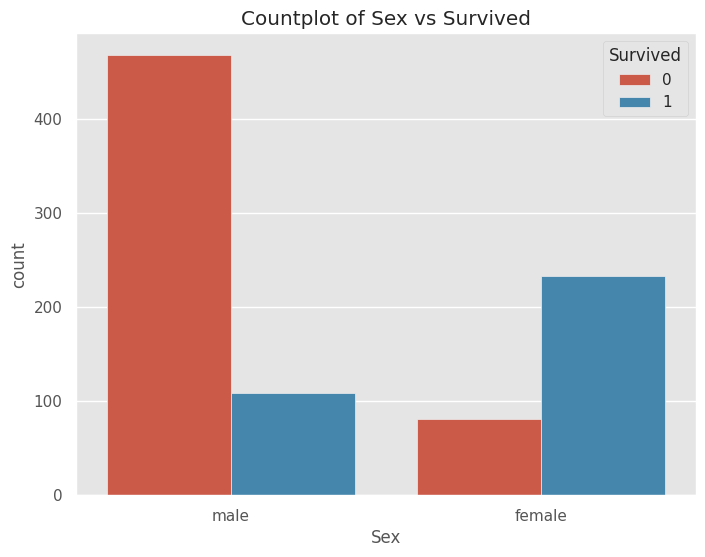

Survived      0     1
SibSp                
0          65.5  34.5
1          46.4  53.6
2          53.6  46.4
3          75.0  25.0
4          83.3  16.7
5         100.0   0.0
8         100.0   0.0




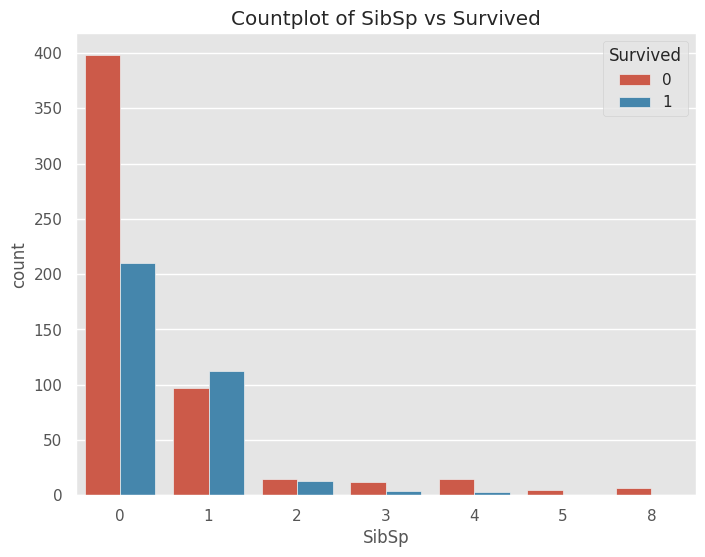

Survived      0     1
Parch                
0          65.6  34.4
1          44.9  55.1
2          50.0  50.0
3          40.0  60.0
4         100.0   0.0
5          80.0  20.0
6         100.0   0.0




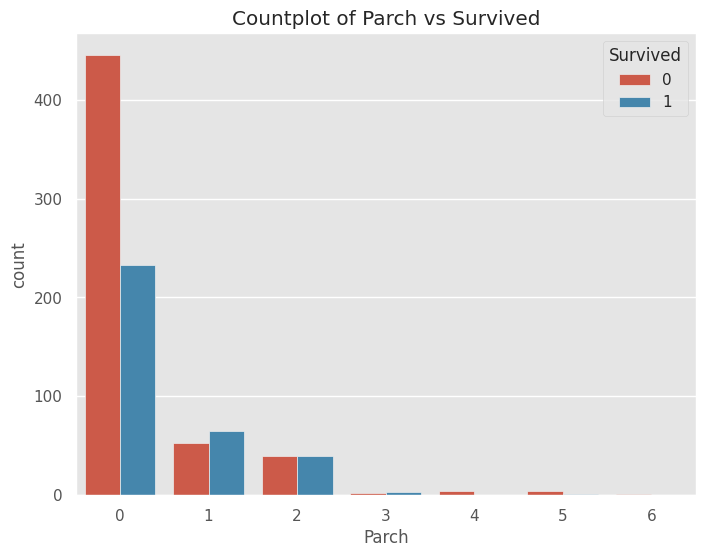

Survived     0     1
Embarked            
C         44.6  55.4
Q         61.0  39.0
S         66.3  33.7




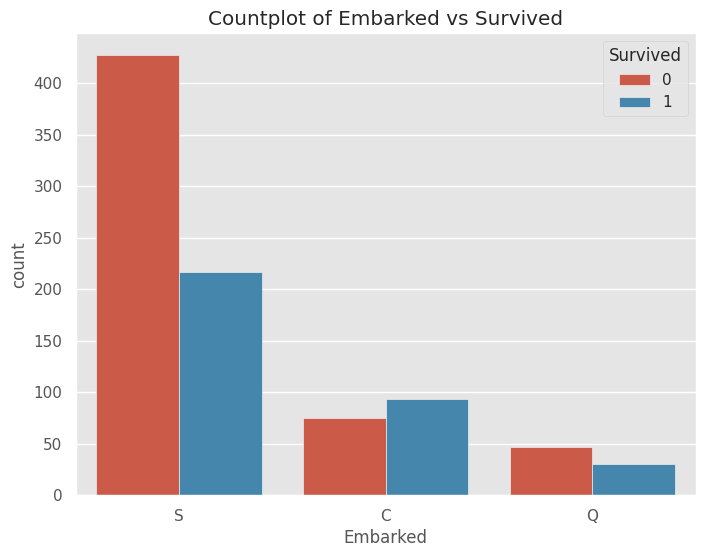

In [ ]:
categorical_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for col in categorical_cols:
    # Crosstab with percentages
    print(pd.crosstab(train_df[col], train_df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1))
    print('\n')

    # Countplot
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Survived', data=train_df)
    plt.title(f'Countplot of {col} vs Survived')
    plt.show()

## By Univariate and Bivariate Analysis, now we have a good idea about the features and their importance.

# Step 6: Data Preparation & Cleaning Checklist
1.   Missing Values
2.   Duplicate and Low Variation Data
3.   Incorrect and Irrelevant Data
4.   Categorical Data
5.   Outliers
6.   Feature Scaling
7.   Feature Engineering/Selection
8.   Validation Split

## **1. Missing Values**

In [ ]:
# checking the missing values in the training dataset
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# finding the percentage of the missing values in every column

# Calculate the percentage of missing values for each column
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100

# Print the results
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


**Dropping The Cabin Column Because It has 77% Missing Values**

In [ ]:
# dropping the Cabin
train_df.drop('Cabin', axis=1, inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


**Imputing the values for age because it has 19.86% missing values**

**Imputation using the scikit KNN Imputer**

In [ ]:
# imputing the missing valeus of age using scikit knn imputer

from sklearn.impute import KNNImputer

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Select numerical columns for imputation (excluding 'PassengerId')
numerical_cols = ['Age']
train_df[numerical_cols] = imputer.fit_transform(train_df[numerical_cols])

In [ ]:
# finding the percentage of the missing values in every column

# Calculate the percentage of missing values for each column
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100

# Print the results
print(missing_percentage)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64


**The rows with missing values of Embarked are deleting because there are only two such rows in the complete dataset**

In [ ]:
# finding the rows containg the missing values of Embarked

# Find rows with missing 'Embarked' values
missing_embarked_rows = train_df[train_df['Embarked'].isnull()]

# Print the rows
missing_embarked_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [ ]:
# dropping these two rows
train_df.dropna(subset=['Embarked'], inplace=True)


In [ ]:
# finding the percentage of the missing values in every column

# Calculate the percentage of missing values for each column
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100

# Print the results
print(missing_percentage)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64


**Till now I have dealt with all the missing values of the data**

## **2. Duplicate and Low Variation Data**

### Data duplication checking and resolution

In [ ]:
train_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [ ]:
train_df.duplicated().sum()

0

In [ ]:
train_df.shape

(889, 11)

In [ ]:
train_df.drop_duplicates(inplace=True)

In [ ]:
train_df.shape

(889, 11)

**There are no duplicated rows in the data**

### Checking for the low variance data

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64


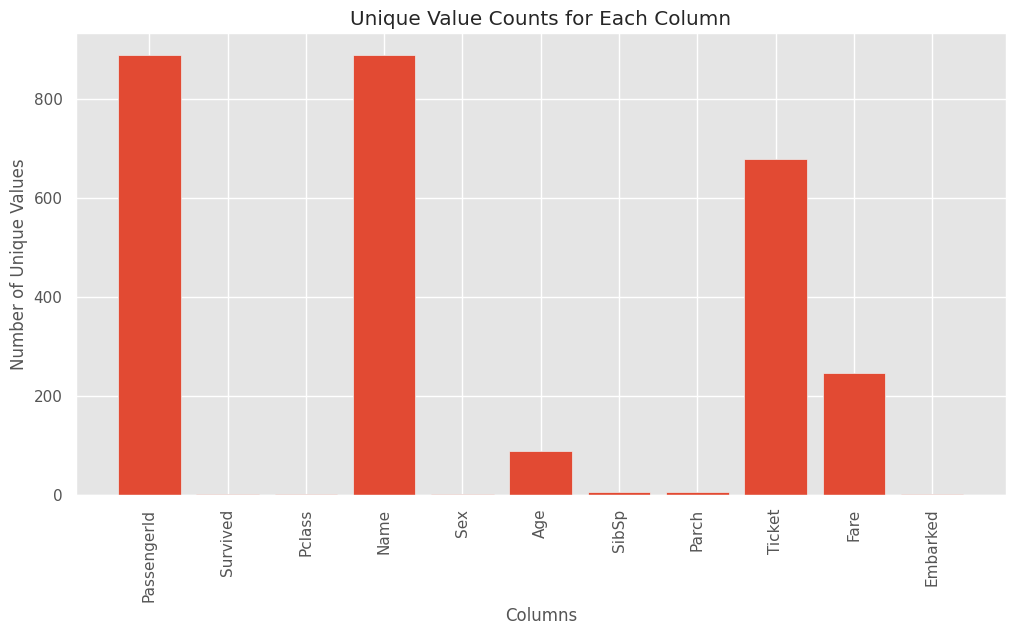

In [ ]:
# Calculate the number of unique values for each column
unique_counts = train_df.nunique()

# print the unique number of the values for each column
print(unique_counts)

# Create a bar plot to visualize the number of unique values for each column
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column")
plt.show()


* **The above graph shows the unique values for each of the four feaatures**

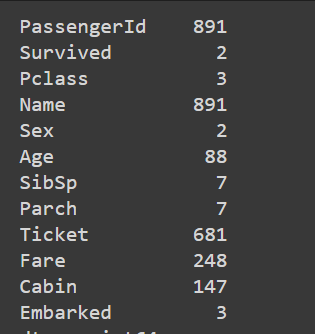


* **As the columns Survived, PClass, Sex, SipSp, Parch and Embarked have few unique values that is why their graph is not so obvious.**


## **3. Incorrect and Irrelevant Data**


**Irrelevant data** is anything that isn’t related specifically
to the problem you’re looking to solve. For example, if
you're predicting house prices, but your dataset contains
commercial properties as well - these would need to be
removed.

**Incorrect data** can be hard to spot! An example could
be looking for values that shouldn’t be possible such a
negative house price values.


*   **As there is no irrelevant and incorrect data in the dataset so no processing is required in this step.**



## **4. Outlier Detection**

### Reasons For Having Outliers


1.   Variability in the data.
2.   An experimental error



### Impacts Of Having Outliers In A Dataset



1.   It causes various problems during out statistical analysis.
2.   It may cause a significant impact on the mean and standard deviation.



### Various Ways Of Finding The Outlier


1.   Using scatter plots
2.   Box plot
3.   Using z-score
4.   Using the IQR (interquartile range)



In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### Finding Outliers using z-score calculation

In [ ]:
# finding the outliers using z-method
from scipy import stats

# Calculate Z-scores for all numerical columns
z_scores = np.abs(stats.zscore(train_df.select_dtypes(include=np.number)))

# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3.5

# Identify rows with outliers in any column
outlier_rows = np.where(z_scores > threshold)

# Get the indices of the rows containing outliers
outlier_indices = list(set(outlier_rows[0]))

# Print the indices of the rows containing outliers
print("Indices of rows with outliers:", outlier_indices)

Indices of rows with outliers: [257, 385, 778, 13, 526, 791, 25, 27, 158, 677, 166, 678, 298, 682, 556, 688, 179, 437, 310, 566, 59, 699, 323, 70, 200, 715, 844, 340, 87, 729, 861, 479, 736, 609, 741, 359, 883, 117, 629, 376, 379, 637]


In [ ]:
# calculating the percentage of outliers

# Calculate the percentage of outliers
percentage_outliers = (len(outlier_indices) / len(train_df)) * 100

print(f"Percentage of outliers in the dataset: {percentage_outliers:.2f}%")

# calculate the number of rows containign outliers
num_outliers = len(outlier_indices)

print(f"Number of rows containing outliers: {num_outliers}")


Percentage of outliers in the dataset: 4.72%
Number of rows containing outliers: 42


### df before dropping outliers

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


### Dropping the outliers

In [ ]:
# Remove rows with outliers
train_df_without_outliers = train_df.drop(train_df.index[outlier_indices])

### df after dropping the outliers

In [ ]:
# Print the DataFrame without outliers
pd.DataFrame(train_df_without_outliers)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


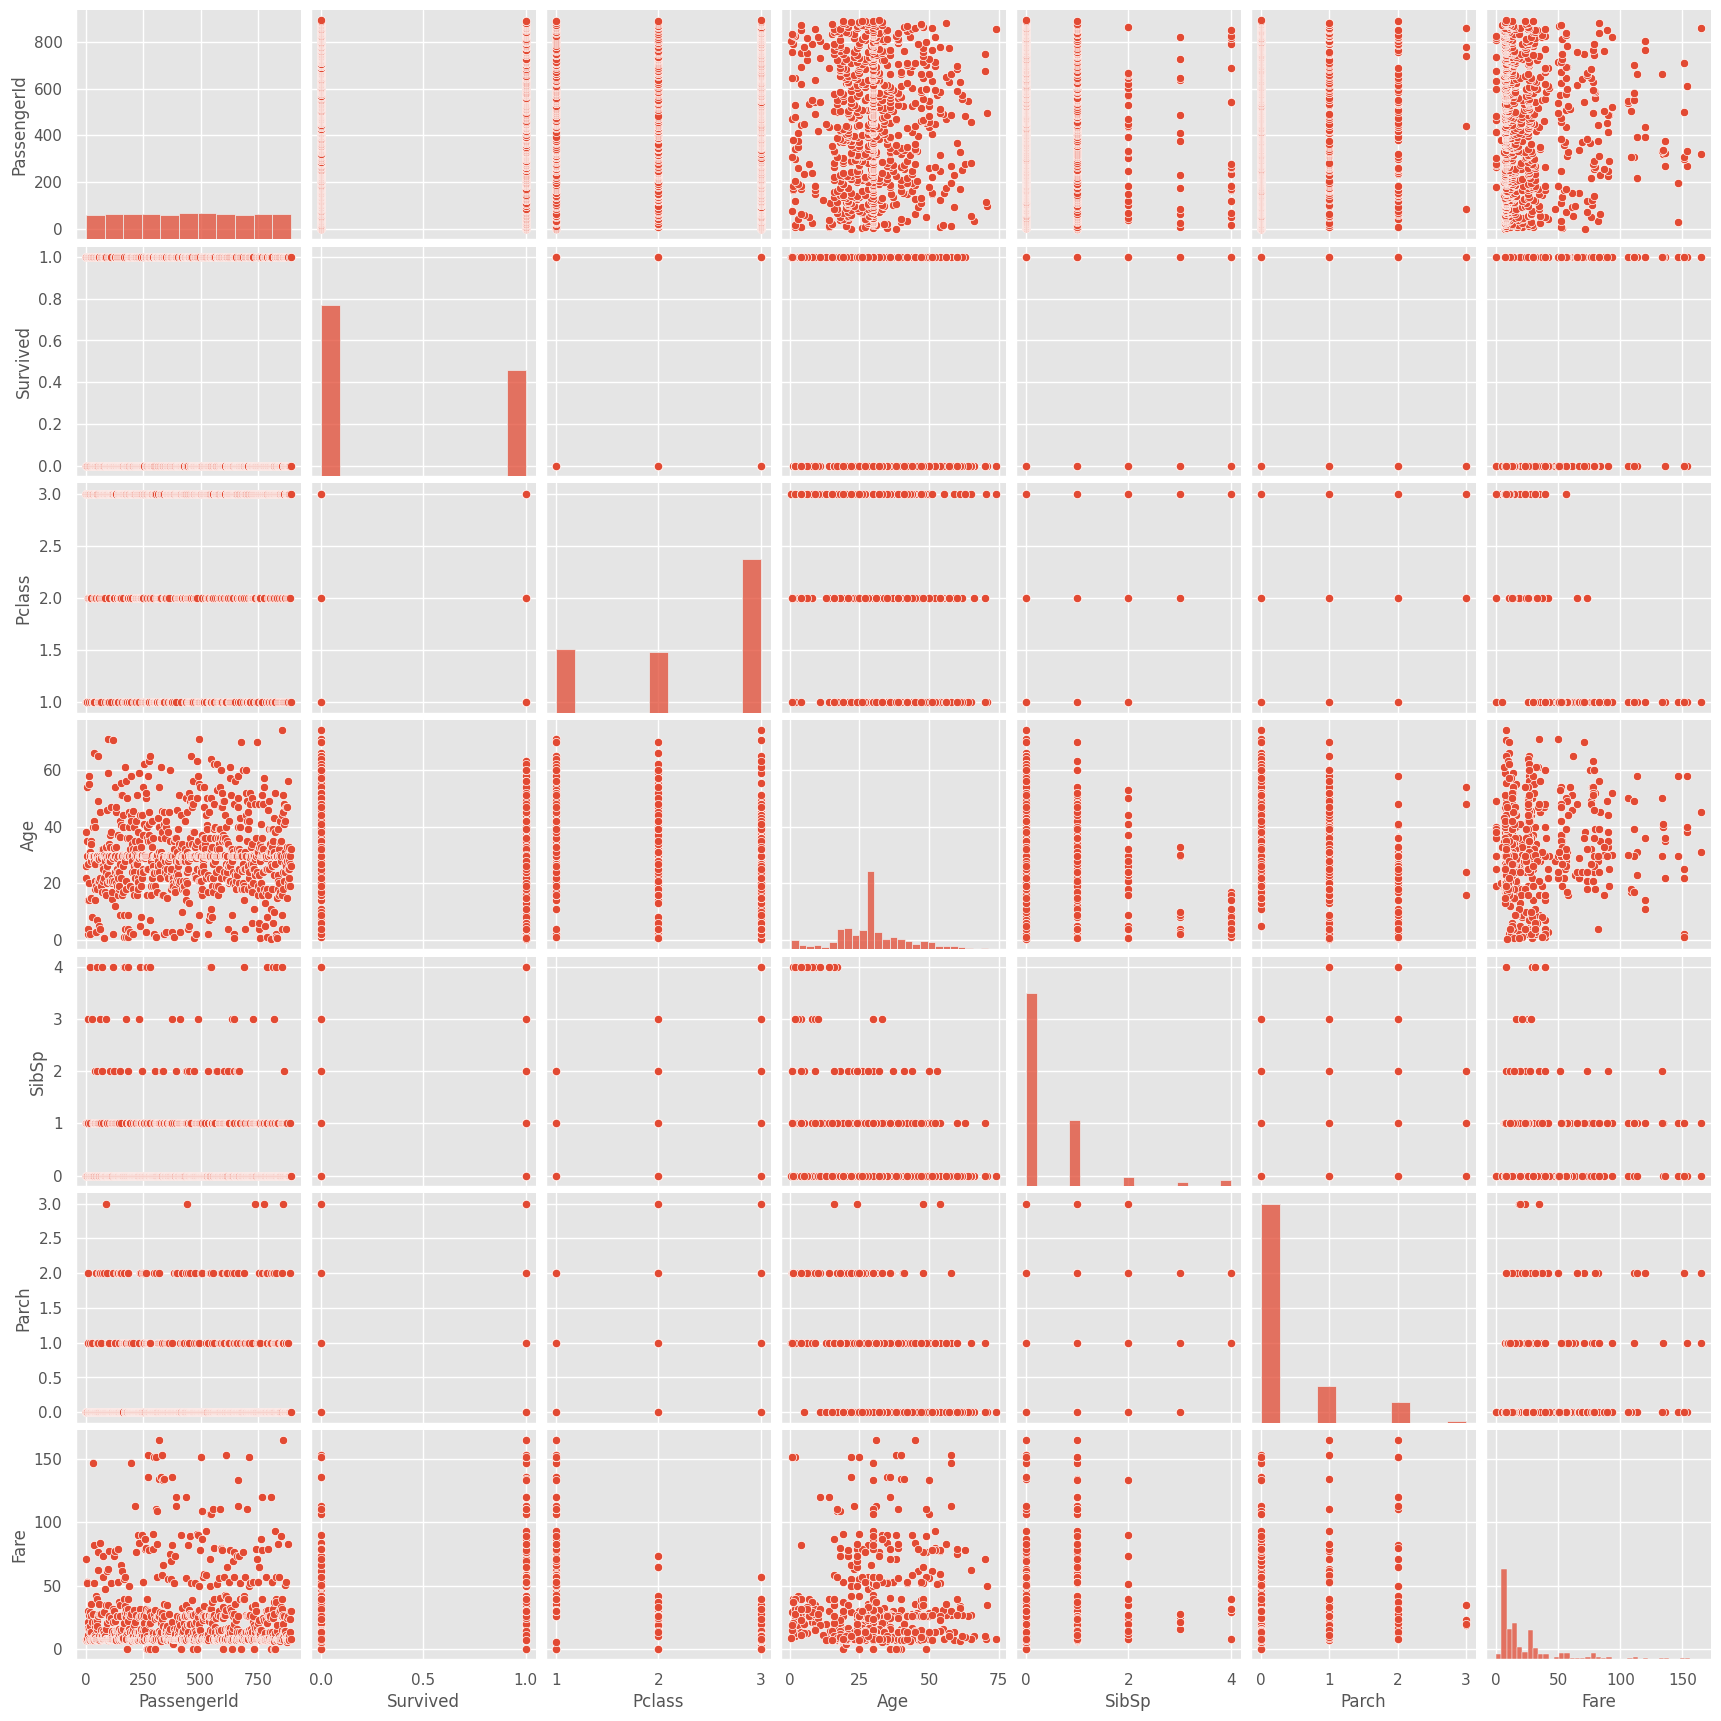

In [ ]:

numerical_cols = train_df_without_outliers.select_dtypes(include=np.number).columns
# Create a scatter plot matrix to visualize potential outliers
sns.pairplot(train_df_without_outliers[numerical_cols])
# sns.scatterplot()

## **5. Feature Engineering And Feature Selection**
**Feature Engineering** is the process of using further
knowledge to supplement or transform the original
feature set.

The key to good Feature Engineering is to create or refine
features that the algorithm or model can understand
better or that it will find more useful than the raw features
for solving the particular problem at hand.

**Feature Selection** is where you only keep a subset of the
most informative variables. This can be done using
human intuition, or dynamically based upon statistical
analysis.

In [ ]:
train_df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  847 non-null    int64  
 1   Survived     847 non-null    int64  
 2   Pclass       847 non-null    int64  
 3   Name         847 non-null    object 
 4   Sex          847 non-null    object 
 5   Age          847 non-null    float64
 6   SibSp        847 non-null    int64  
 7   Parch        847 non-null    int64  
 8   Ticket       847 non-null    object 
 9   Fare         847 non-null    float64
 10  Embarked     847 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 79.4+ KB


In [ ]:
train_df_without_outliers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# making a new column of family_size that is the sum of Parch and Sipsp
train_df_without_outliers['family_size'] = train_df_without_outliers['Parch'] + train_df_without_outliers['SibSp']
# add this column to the train_df_scaled
train_df_without_outliers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [ ]:
# now checking the vlaeus in the family size
train_df_without_outliers['family_size'].value_counts()

,count
family_size,
0,527
1,155
2,101
3,29
5,14
4,12
6,9


In [ ]:
# now making a new column named family_category and setting threshhold on family_size to convert it into small, medium and large family
train_df_without_outliers['family_category'] = train_df_without_outliers['family_size'].apply(lambda x: 'small' if x <= 2 else ('medium' if x <= 4 else 'large'))
train_df_without_outliers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,small
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,small


In [ ]:
# counting the values in the family_category
train_df_without_outliers['family_category'].value_counts()


,count
family_category,
small,783
medium,41
large,23


In [ ]:
# dropping the columns Parch, SibSp, and Family_Size because we have derived a new column from them
train_df_without_outliers = train_df_without_outliers.drop(['Parch', 'SibSp', 'family_size'], axis=1)

In [ ]:
train_df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847 entries, 0 to 890
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      847 non-null    int64  
 1   Survived         847 non-null    int64  
 2   Pclass           847 non-null    int64  
 3   Name             847 non-null    object 
 4   Sex              847 non-null    object 
 5   Age              847 non-null    float64
 6   Ticket           847 non-null    object 
 7   Fare             847 non-null    float64
 8   Embarked         847 non-null    object 
 9   family_category  847 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 72.8+ KB


In [ ]:
# again checking for the outliers for verification
# finding the outliers using z-method
from scipy import stats

# Calculate Z-scores for all numerical columns
z_scores = np.abs(stats.zscore(train_df_without_outliers.select_dtypes(include=np.number)))

# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3.5

# Identify rows with outliers in any column
outlier_rows = np.where(z_scores > threshold)

# Get the indices of the rows containing outliers
outlier_indices = list(set(outlier_rows[0]))

# Print the indices of the rows containing outliers
print("Indices of rows with outliers:", outlier_indices)

Indices of rows with outliers: [256, 321, 674, 291, 355, 583, 631, 814, 303, 304, 284, 309, 316, 184, 475, 28, 318, 255]


In [ ]:
# printing the rows with outliers for data insights
train_df_without_outliers.iloc[outlier_indices]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_category
269,270,1,1,"Bissette, Miss. Amelia",female,35.000000,PC 17760,135.6333,S,small
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.000000,16966,134.5000,C,small
708,709,1,1,"Cleaver, Miss. Alice",female,22.000000,113781,151.5500,S,small
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.920000,113781,151.5500,S,medium
373,374,0,1,"Ringhini, Mr. Sante",male,22.000000,PC 17760,135.6333,C,small
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.000000,PC 17582,153.4625,S,small
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.000000,PC 17611,133.6500,S,small
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,36928,164.8667,S,small
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.000000,36928,164.8667,S,small
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.000000,16966,134.5000,C,small


In [ ]:
# calculating the percentage of the outliers
percentage_outliers = (len(outlier_indices) / len(train_df_without_outliers)) * 100

print(f"Percentage of outliers in the dataset: {percentage_outliers:.2f}%")

Percentage of outliers in the dataset: 2.13%


In [ ]:
# dropping these two percent of the outleirs
train_df_without_outliers = train_df_without_outliers.drop(train_df_without_outliers.index[outlier_indices])

In [ ]:
train_df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 0 to 890
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      829 non-null    int64  
 1   Survived         829 non-null    int64  
 2   Pclass           829 non-null    int64  
 3   Name             829 non-null    object 
 4   Sex              829 non-null    object 
 5   Age              829 non-null    float64
 6   Ticket           829 non-null    object 
 7   Fare             829 non-null    float64
 8   Embarked         829 non-null    object 
 9   family_category  829 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 71.2+ KB


## **6. Categorical Data**

In [ ]:
train_df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 0 to 890
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      829 non-null    int64  
 1   Survived         829 non-null    int64  
 2   Pclass           829 non-null    int64  
 3   Name             829 non-null    object 
 4   Sex              829 non-null    object 
 5   Age              829 non-null    float64
 6   Ticket           829 non-null    object 
 7   Fare             829 non-null    float64
 8   Embarked         829 non-null    object 
 9   family_category  829 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 71.2+ KB


In [ ]:
# printing the categorical columns
categorical_columns = train_df_without_outliers.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Name', 'Sex', 'Ticket', 'Embarked', 'family_category'], dtype='object')


In [ ]:
# encoding the categorical columns using the label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in categorical_columns:
    train_df_without_outliers[column] = label_encoder.fit_transform(train_df_without_outliers[column])
    print(f"Encoded column: {column}")


Encoded column: Name
Encoded column: Sex
Encoded column: Ticket
Encoded column: Embarked
Encoded column: family_category


In [ ]:
train_df_without_outliers.shape

(829, 10)

In [ ]:
train_df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 0 to 890
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      829 non-null    int64  
 1   Survived         829 non-null    int64  
 2   Pclass           829 non-null    int64  
 3   Name             829 non-null    int64  
 4   Sex              829 non-null    int64  
 5   Age              829 non-null    float64
 6   Ticket           829 non-null    int64  
 7   Fare             829 non-null    float64
 8   Embarked         829 non-null    int64  
 9   family_category  829 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 71.2 KB


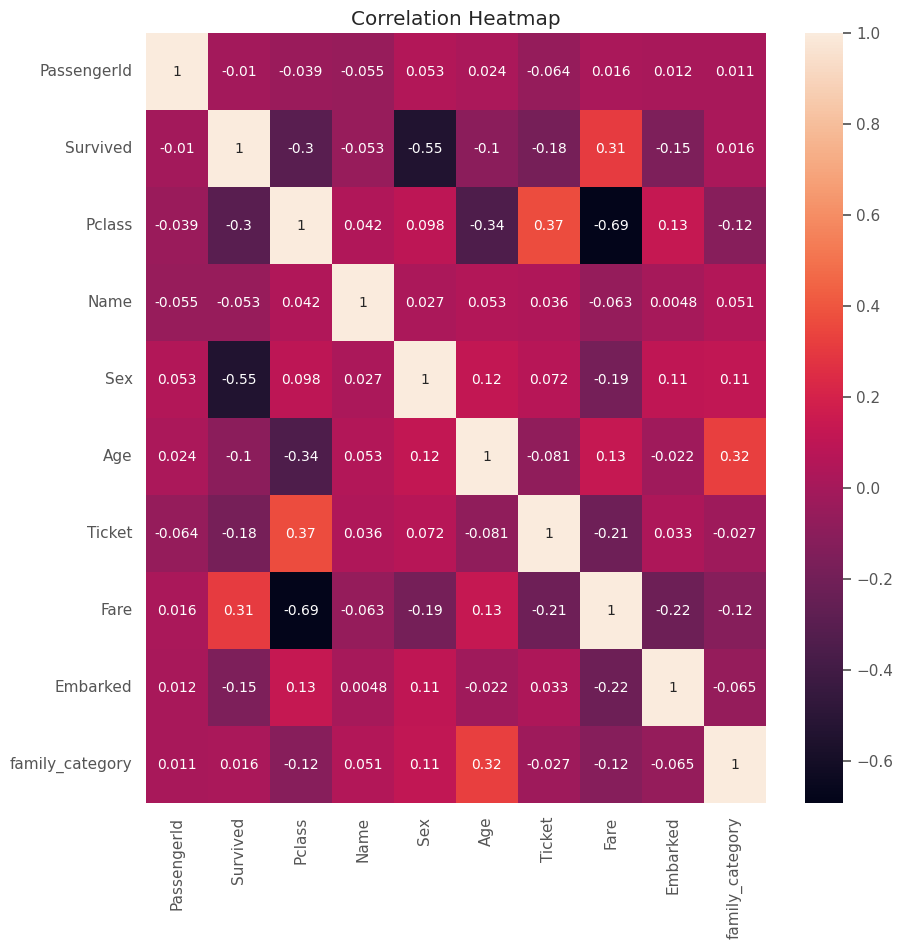

In [ ]:
corr = train_df_without_outliers.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True )
plt.title('Correlation Heatmap')
plt.show()

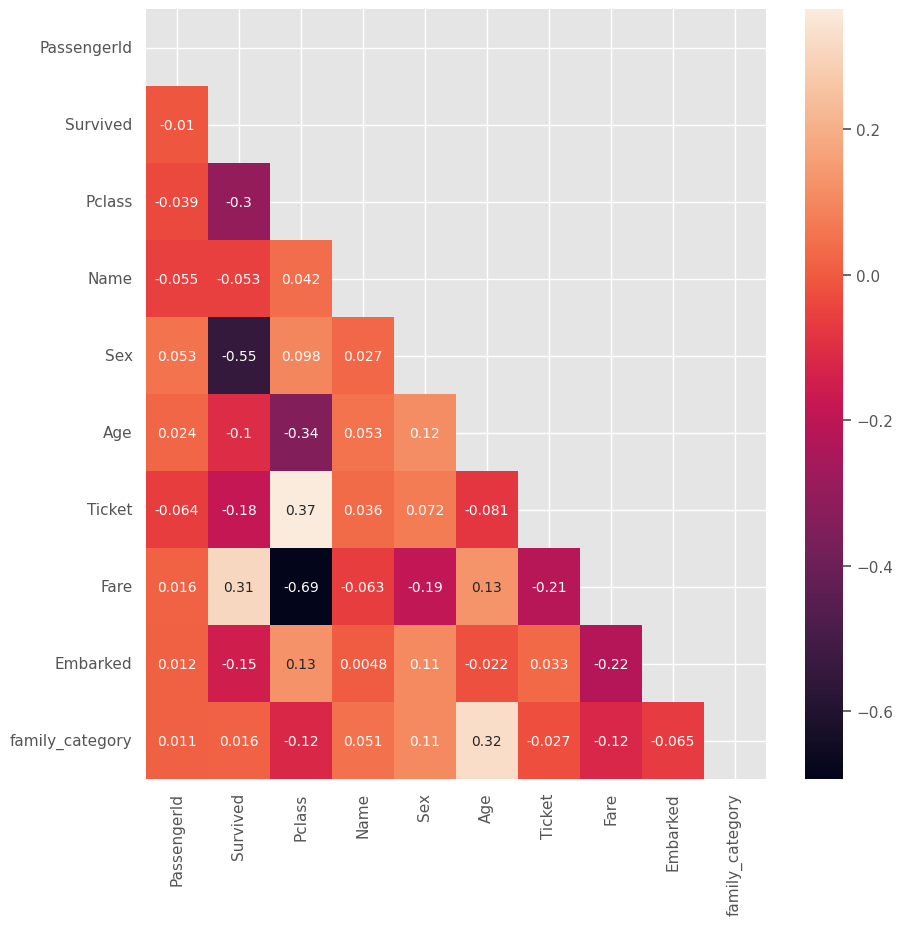

In [ ]:
# Generate a correlation matrix
corr = train_df_without_outliers.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
# masking the upper triagle repleated values
masking = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask= masking)
plt.show()

## **7. Feature Scaling**

Feature Scaling is where you force all the values from a
column in your data to exist on the same scale. In certain
scenarios it will help the model assess the relationships
between variables more fairly, and more accurately.

The two most common scaling techniques are:

**Standardisation:** rescales all values to have a mean of 0
and standard deviation of 1. In other words, the majority
of your values end up between -4 and +4

**Normalisation:** rescales data so that it exists in a range
between 0 and 1

**Feature Scaling is essential** for distance-based models
such as k-means or k-nearest-neighbours.

**Feature Scaling is recommended** for any algorithms that
utilise Gradient Descent such as Linear Regression,
Logistic Regression, and Neural Networks.

**Feature Scaling is not necessary** for tree-based
algorithms such as Decision Trees & Random Forests.

**No need of scaling for decision trees**

# Step 7: Customization of test dataset

**prepare the test dataset in the same way**

In [ ]:
# 1. Load the test dataset
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/lab06/dataset/test.csv")

In [ ]:
# checking for the missing values in the test_df
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


## **1. Missing Values**

In [ ]:
# checking the missing values in the training dataset
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
# finding the percentage of the missing values in every column

# Calculate the percentage of missing values for each column
missing_percentage = (test_df.isnull().sum() / len(test_df)) * 100

# Print the results
print(missing_percentage)

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


**Dropping The Cabin Column Because It has 78% Missing Values**

In [ ]:
# dropping the Cabin
test_df.drop('Cabin', axis=1, inplace=True)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


**Imputing the values for age because it has 20.57% missing values**

**Imputation using the scikit KNN Imputer**

In [ ]:
# imputing the missing valeus of age using scikit knn imputer

from sklearn.impute import KNNImputer

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Select numerical columns for imputation (excluding 'PassengerId')
numerical_cols = ['Age']
test_df[numerical_cols] = imputer.fit_transform(test_df[numerical_cols])

In [ ]:
# finding the percentage of the missing values in every column

# Calculate the percentage of missing values for each column
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100

# Print the results
print(missing_percentage)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


**Till now I have dealt with all the missing values of the data**

## **2. Duplicate and Low Variation Data**

### Data duplication checking and resolution

In [ ]:
test_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
413,False
414,False
415,False
416,False


In [ ]:
test_df.duplicated().sum()

0

In [ ]:
test_df.shape

(418, 10)

In [ ]:
test_df.drop_duplicates(inplace=True)

In [ ]:
test_df.shape

(418, 10)

**There are no duplicated rows in the data**

### Checking for the low variance data

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           169
Embarked         3
dtype: int64


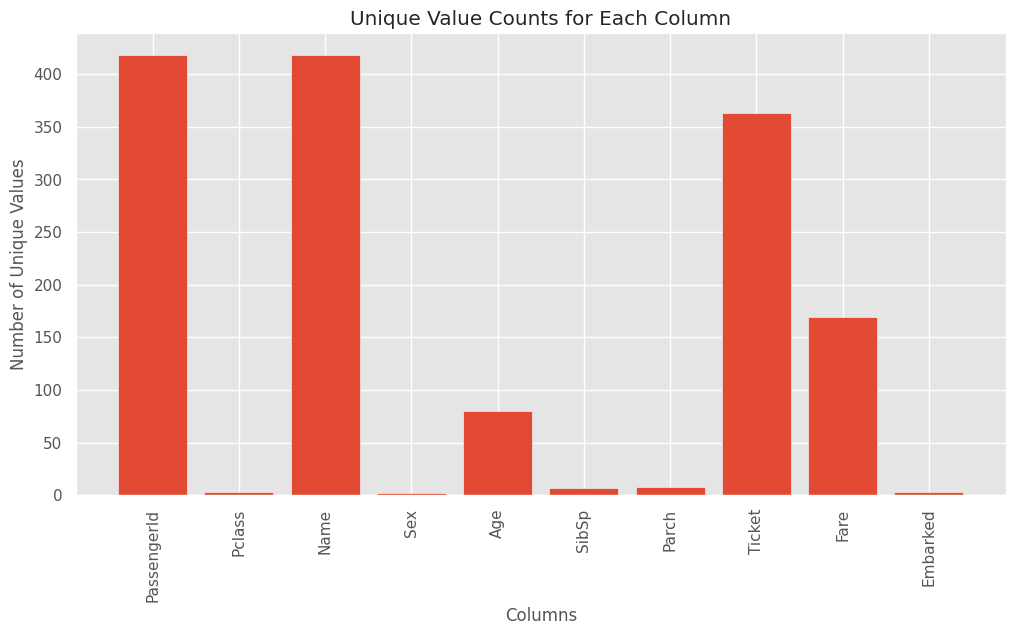

In [ ]:
# Calculate the number of unique values for each column
unique_counts = test_df.nunique()

# print the unique number of the values for each column
print(unique_counts)

# Create a bar plot to visualize the number of unique values for each column
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column")
plt.show()


* **The above graph shows the unique values for each of the four feaatures**

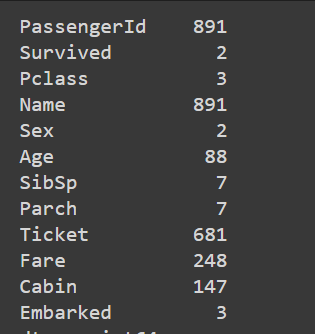


* **As the columns Survived, PClass, Sex, SipSp, Parch and Embarked have few unique values that is why their graph is not so obvious.**


## **3. Incorrect and Irrelevant Data**


**Irrelevant data** is anything that isn’t related specifically
to the problem you’re looking to solve. For example, if
you're predicting house prices, but your dataset contains
commercial properties as well - these would need to be
removed.

**Incorrect data** can be hard to spot! An example could
be looking for values that shouldn’t be possible such a
negative house price values.


*   **As there is no irrelevant and incorrect data in the dataset so no processing is required in this step.**



## **4. Feature Engineering And Feature Selection**
**Feature Engineering** is the process of using further
knowledge to supplement or transform the original
feature set.

The key to good Feature Engineering is to create or refine
features that the algorithm or model can understand
better or that it will find more useful than the raw features
for solving the particular problem at hand.

**Feature Selection** is where you only keep a subset of the
most informative variables. This can be done using
human intuition, or dynamically based upon statistical
analysis.

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
# making a new column of family_size that is the sum of Parch and Sipsp
test_df['family_size'] = test_df['Parch'] + test_df['SibSp']
# add this column to the train_df_scaled
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2


In [ ]:
# now checking the vlaeus in the family size
test_df['family_size'].value_counts()

,count
family_size,
0,253
1,74
2,57
3,14
4,7
6,4
10,4
5,3
7,2


In [ ]:
# now making a new column named family_category and setting threshhold on family_size to convert it into small, medium and large family
test_df['family_category'] = test_df['family_size'].apply(lambda x: 'small' if x <= 2 else ('medium' if x <= 4 else 'large'))
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_category
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,small
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,small
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,small
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,small
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2,small


In [ ]:
# counting the values in the family_category
test_df['family_category'].value_counts()


,count
family_category,
small,384
medium,21
large,13


In [ ]:
# dropping the columns Parch, SibSp, and Family_Size because we have derived a new column from them
test_df = test_df.drop(['Parch', 'SibSp', 'family_size'], axis=1)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      418 non-null    int64  
 1   Pclass           418 non-null    int64  
 2   Name             418 non-null    object 
 3   Sex              418 non-null    object 
 4   Age              418 non-null    float64
 5   Ticket           418 non-null    object 
 6   Fare             417 non-null    float64
 7   Embarked         418 non-null    object 
 8   family_category  418 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 29.5+ KB


## **5. Categorical Data**

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      418 non-null    int64  
 1   Pclass           418 non-null    int64  
 2   Name             418 non-null    object 
 3   Sex              418 non-null    object 
 4   Age              418 non-null    float64
 5   Ticket           418 non-null    object 
 6   Fare             417 non-null    float64
 7   Embarked         418 non-null    object 
 8   family_category  418 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 29.5+ KB


In [ ]:
# printing the categorical columns
categorical_columns = test_df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Name', 'Sex', 'Ticket', 'Embarked', 'family_category'], dtype='object')


In [ ]:
# encoding the categorical columns using the label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in categorical_columns:
    test_df[column] = label_encoder.fit_transform(test_df[column])
    print(f"Encoded column: {column}")


Encoded column: Name
Encoded column: Sex
Encoded column: Ticket
Encoded column: Embarked
Encoded column: family_category


In [ ]:
test_df.shape

(418, 9)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      418 non-null    int64  
 1   Pclass           418 non-null    int64  
 2   Name             418 non-null    int64  
 3   Sex              418 non-null    int64  
 4   Age              418 non-null    float64
 5   Ticket           418 non-null    int64  
 6   Fare             417 non-null    float64
 7   Embarked         418 non-null    int64  
 8   family_category  418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


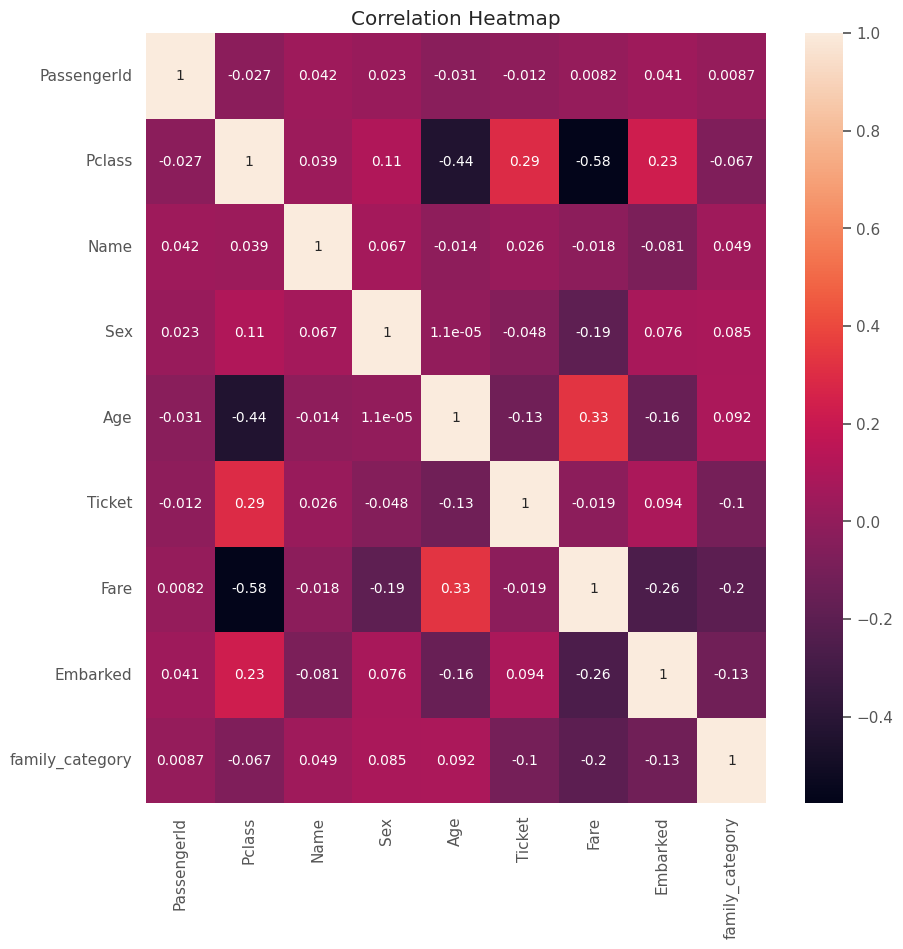

In [ ]:
corr = test_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True )
plt.title('Correlation Heatmap')
plt.show()

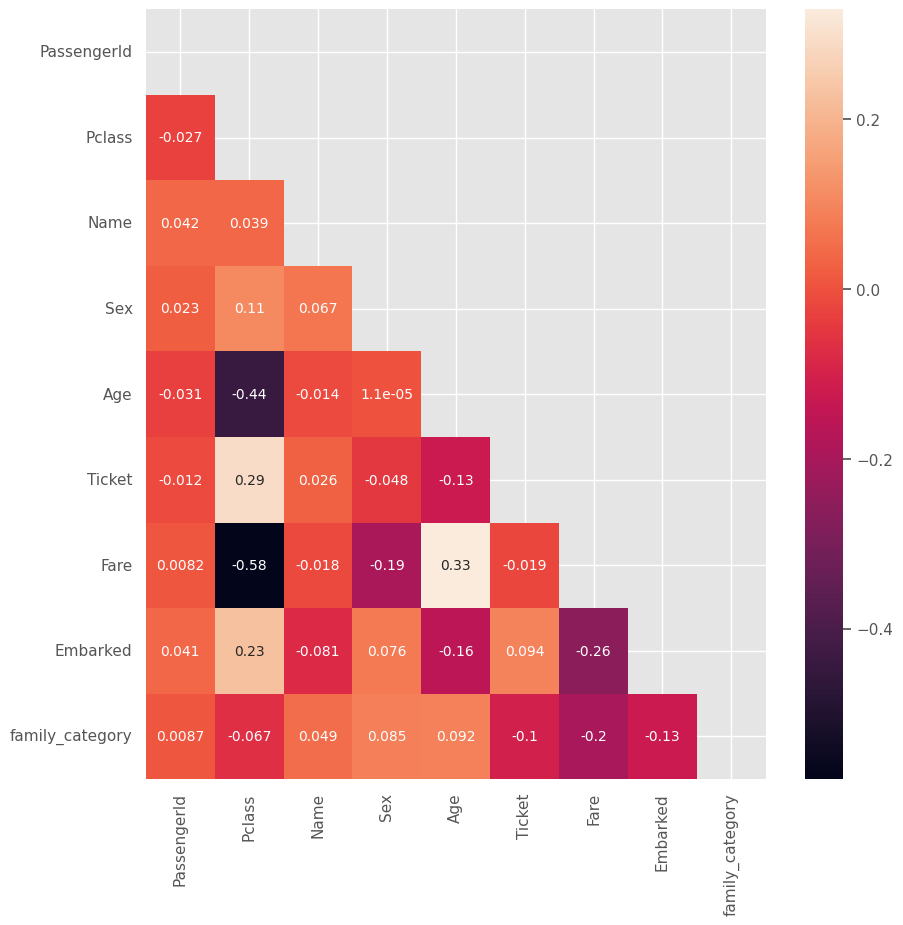

In [ ]:
# Generate a correlation matrix
corr = test_df.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
# masking the upper triagle repleated values
masking = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask= masking)
plt.show()

# Step 8: Training the Model


In [ ]:
# importing the gender submission from the drive /content/drive/MyDrive/Colab Notebooks/lab06/dataset/gender_submission.csv
gender_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lab06/dataset/gender_submission.csv')
gender_submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
train_df_without_outliers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_category
0,1,0,3,95,1,22.0,515,7.2500,2,2
1,2,1,1,174,0,38.0,582,71.2833,0,2
2,3,1,3,321,0,26.0,650,7.9250,2,2
3,4,1,1,248,0,35.0,46,53.1000,2,2
4,5,0,3,14,1,35.0,464,8.0500,2,2


In [ ]:
X_train = train_df_without_outliers.drop('Survived', axis=1)
y_train = train_df_without_outliers['Survived']

In [ ]:
X_test = test_df
y_test = gender_submission['Survived']

In [ ]:


# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [ ]:
# Ensure X_test and y_test have the same number of samples
# Check the shape of X_test and y_test
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Check if y_test is aligned with the predictions from X_test
# y_test should correspond to the 'Survived' column for the same passengers in X_test.
# It's likely that y_test was derived from a different source (e.g., gender_submission)
# and needs to be aligned with the passenger IDs in X_test.


Shape of X_test: (418, 9)
Shape of y_test: (418,)


In [ ]:
# comparing the target variable with target variable in gender_submission
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,

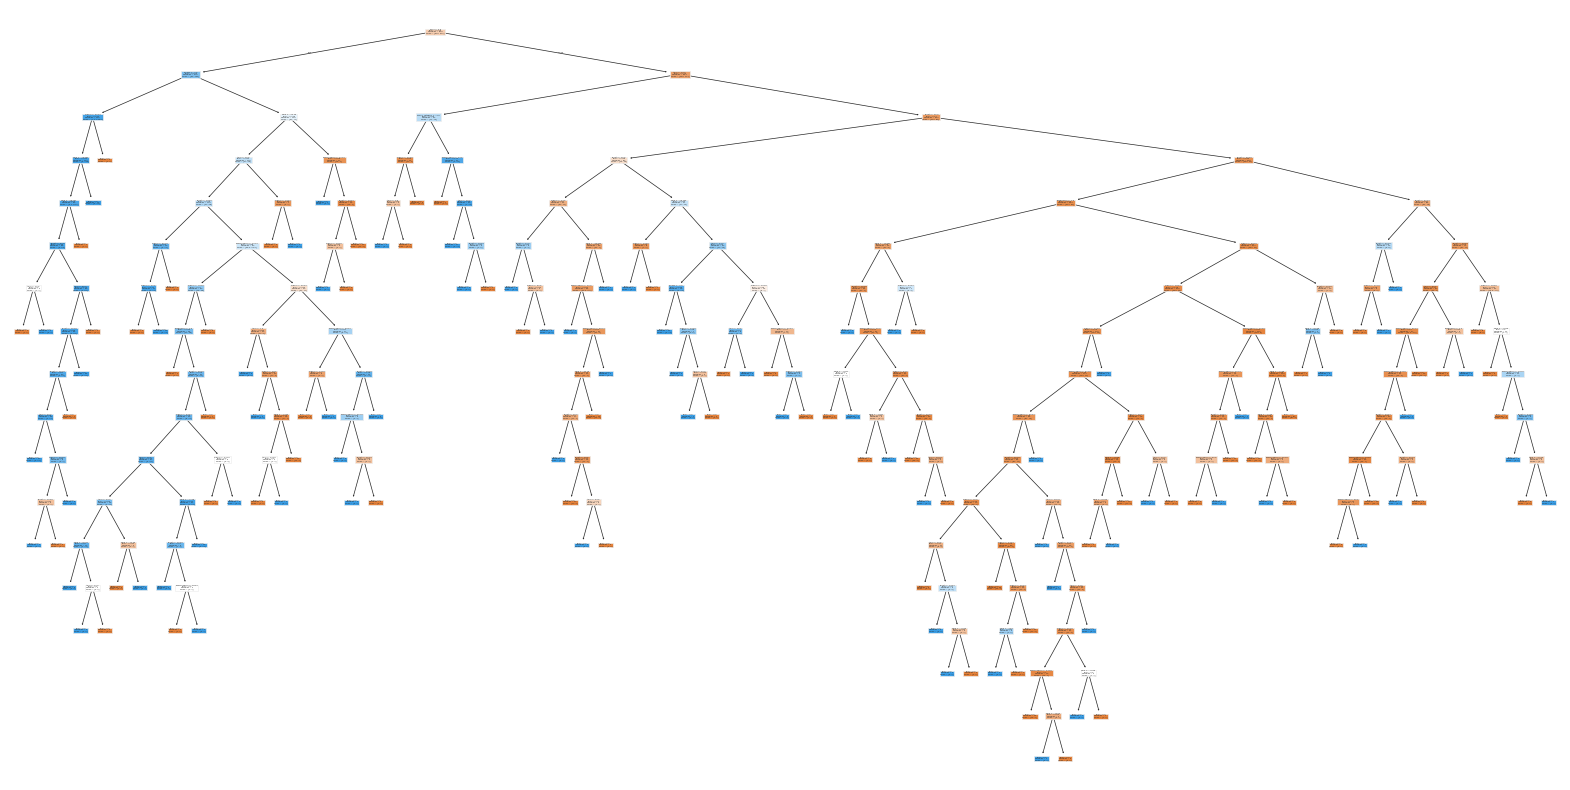

In [ ]:
# importing the plot tree
from sklearn.tree import plot_tree

# plot the tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X_train.columns)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# calculating the accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
#   classification report
print(classification_report(y_test, y_pred))



Accuracy: 0.6889952153110048
              precision    recall  f1-score   support

           0       0.82      0.65      0.73       266
           1       0.55      0.75      0.64       152

    accuracy                           0.69       418
   macro avg       0.69      0.70      0.68       418
weighted avg       0.72      0.69      0.69       418



# **Improvements Using Pre-Pruning**

## **With max depth = 6, we have 77% accuracy**

In [ ]:
# again fitting the model with max depth 5
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# calculating the accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
#   classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7799043062200957
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       266
           1       0.70      0.70      0.70       152

    accuracy                           0.78       418
   macro avg       0.76      0.76      0.76       418
weighted avg       0.78      0.78      0.78       418



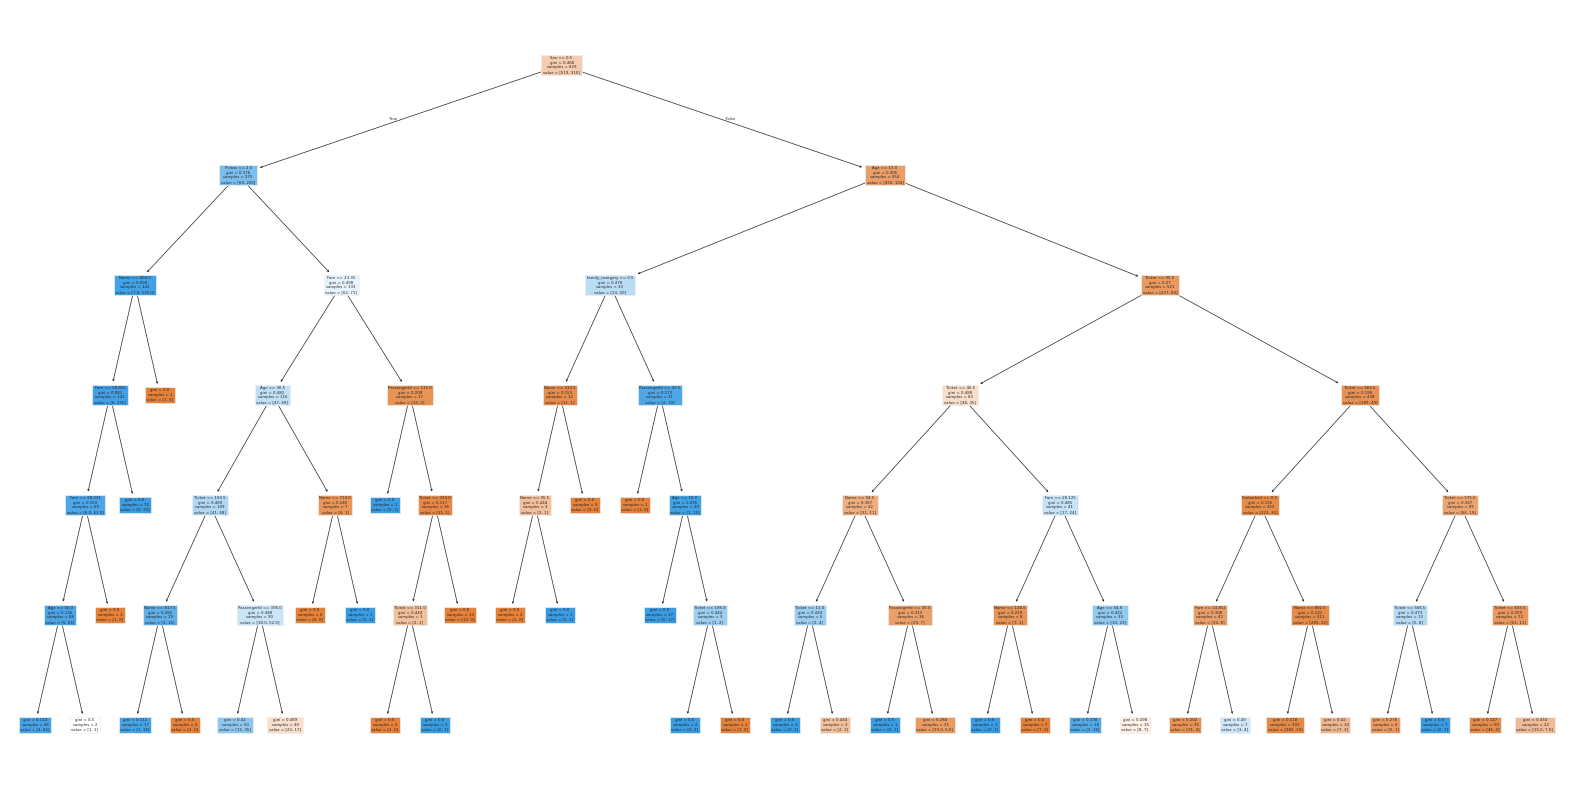

In [ ]:
# tree ploting
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X_train.columns)
plt.show()

## **With Max Depth = 5 , We have 90% Accuracy**

In [ ]:
# again fitting the model with max depth 5
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# calculating the accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
#   classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9066985645933014
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       266
           1       0.84      0.92      0.88       152

    accuracy                           0.91       418
   macro avg       0.90      0.91      0.90       418
weighted avg       0.91      0.91      0.91       418



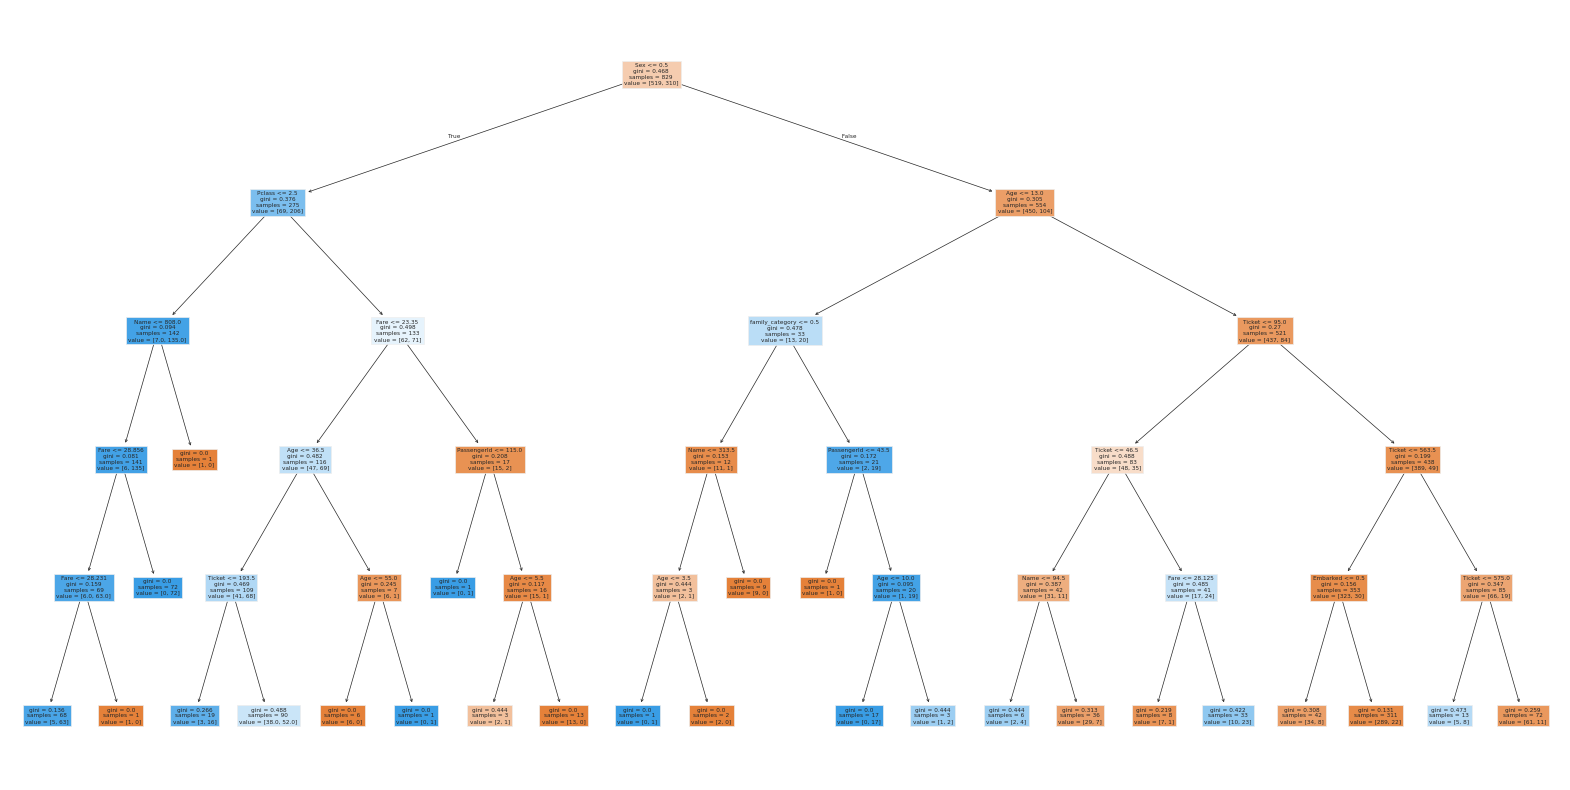

In [ ]:
# tree ploting
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X_train.columns)
plt.show()

## **With max depth = 4, we have 84% accuracy**

In [ ]:
# again fitting the model with max depth 5
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# calculating the accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
#   classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8492822966507177
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       266
           1       0.73      0.92      0.82       152

    accuracy                           0.85       418
   macro avg       0.84      0.86      0.84       418
weighted avg       0.87      0.85      0.85       418



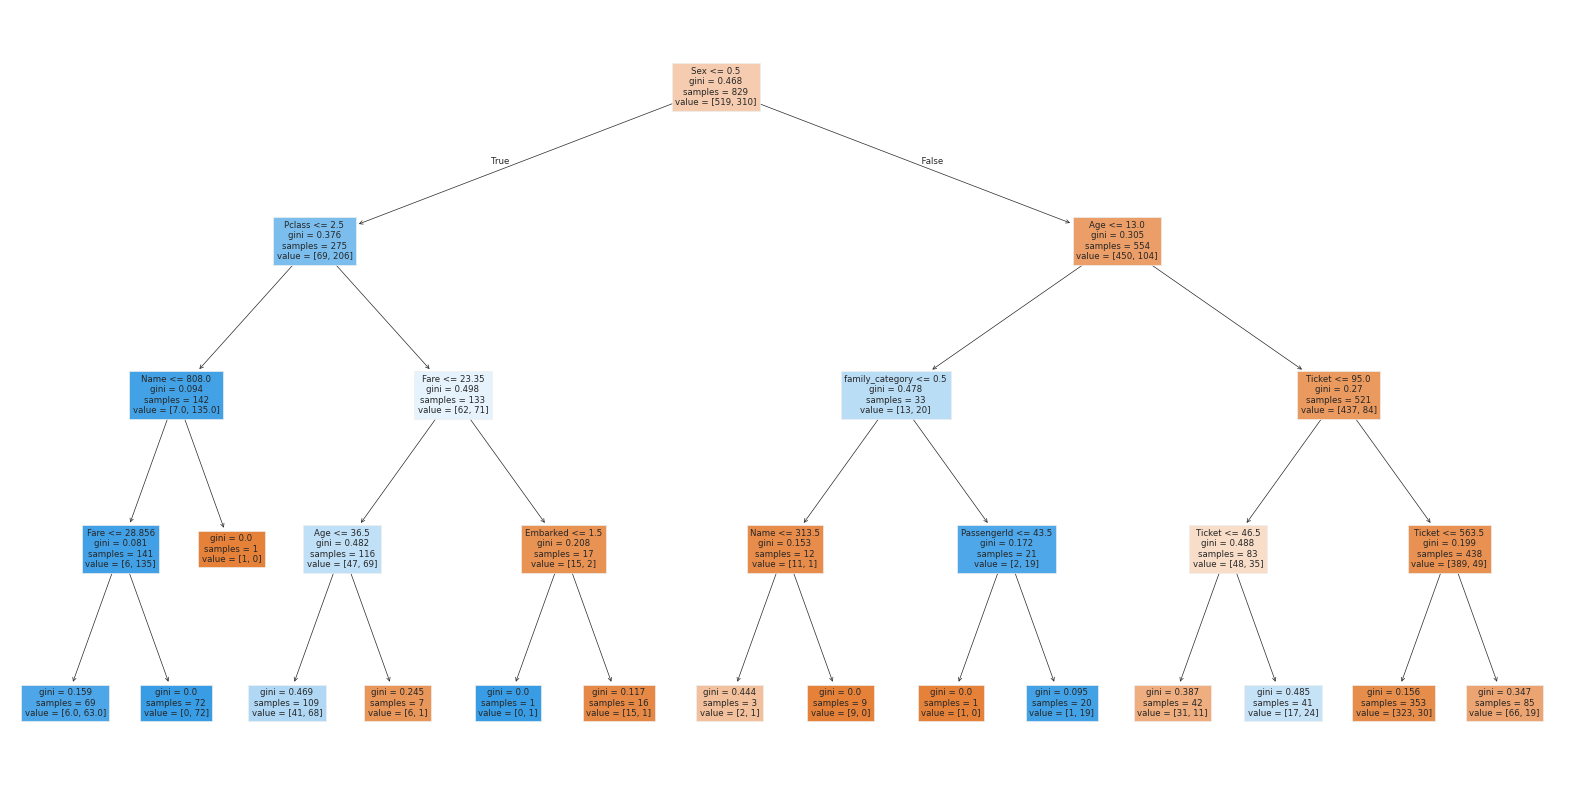

In [ ]:
# tree ploting
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X_train.columns)
plt.show()

## **With max depth = 3, we have 95% accuracy**

In [ ]:
# again fitting the model with max depth 5
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# calculating the accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
#   classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9545454545454546
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       266
           1       0.92      0.96      0.94       152

    accuracy                           0.95       418
   macro avg       0.95      0.96      0.95       418
weighted avg       0.96      0.95      0.95       418



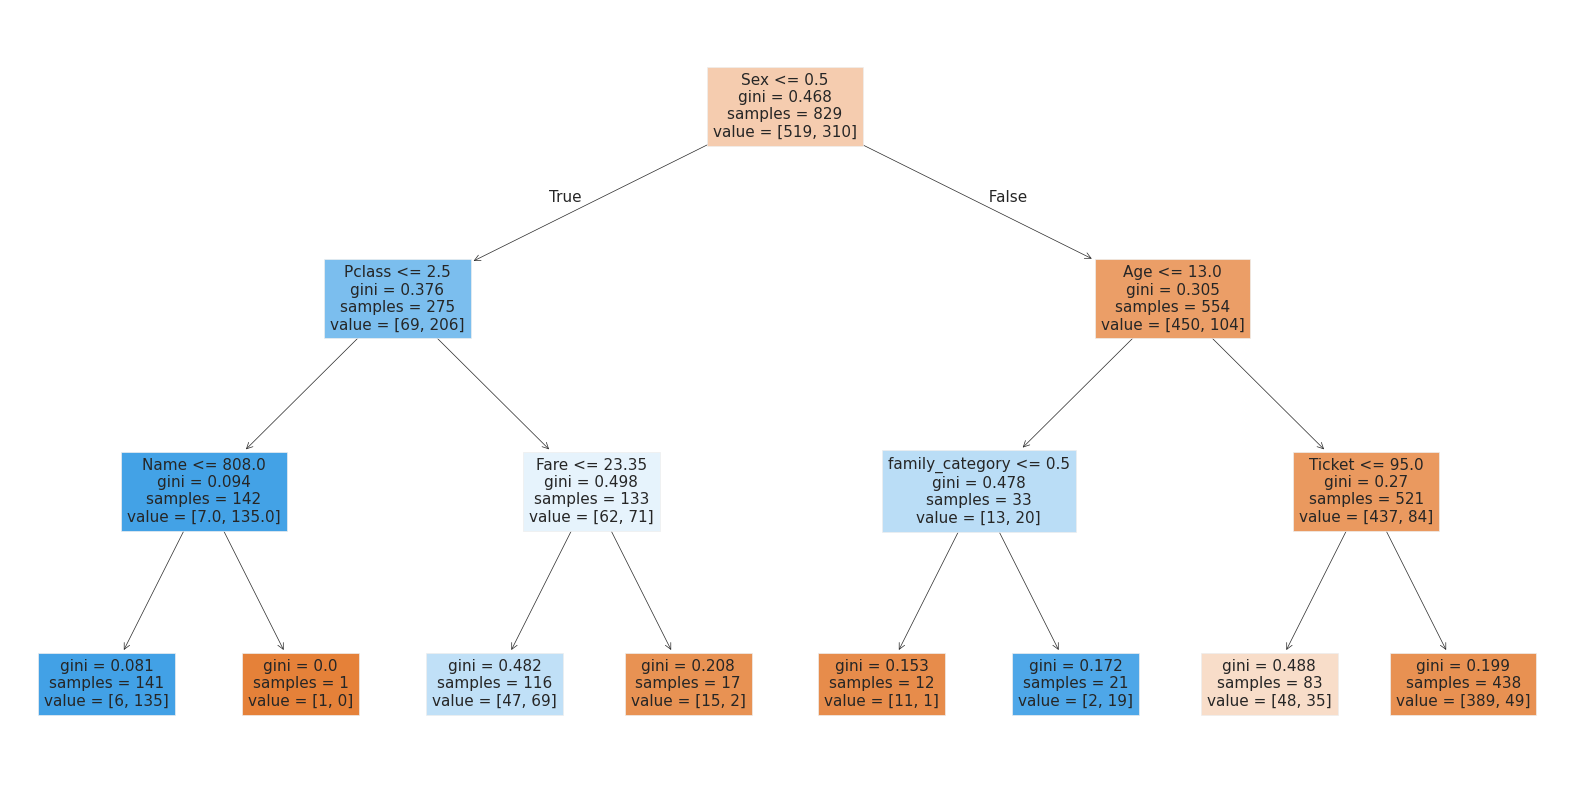

In [ ]:
# tree ploting
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X_train.columns)
plt.show()

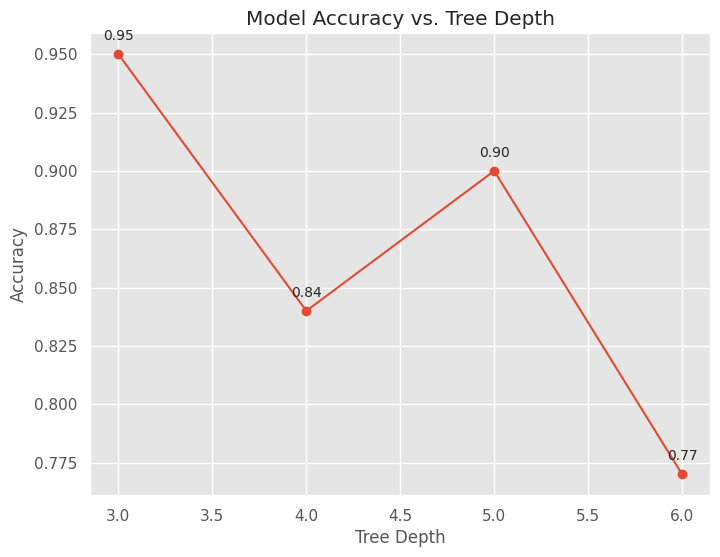

In [ ]:
# draw some graph to show the summary of results of all models with different depths

import matplotlib.pyplot as plt

# Sample data (replace with your actual results)
depths = [3, 4, 5, 6]
accuracies = [0.95, 0.84, 0.90, 0.77]  # Replace with your actual accuracy values

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-')
plt.title('Model Accuracy vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.grid(True)

# Add data labels
for i, txt in enumerate(accuracies):
    plt.annotate(f"{txt:.2f}", (depths[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.show()

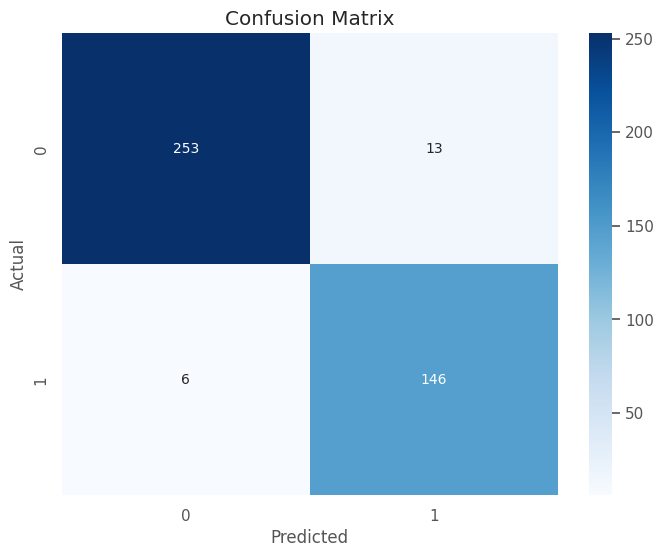

In [ ]:
# importing confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## **ROC-AUC**

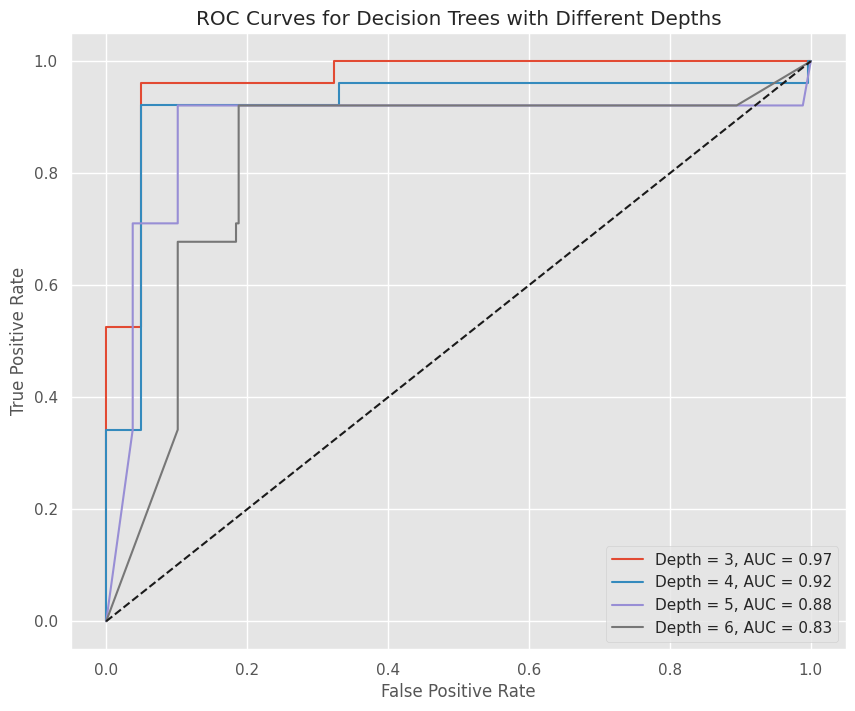

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Different depths to evaluate
depths = [3, 4, 5, 6]
plt.figure(figsize=(10, 8))

# Loop over each depth
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)

    # Predict probabilities for the positive class (1)
    y_proba = clf.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"Depth = {depth}, AUC = {auc_score:.2f}")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.title("ROC Curves for Decision Trees with Different Depths")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# **Improvements Using Post Pruning**

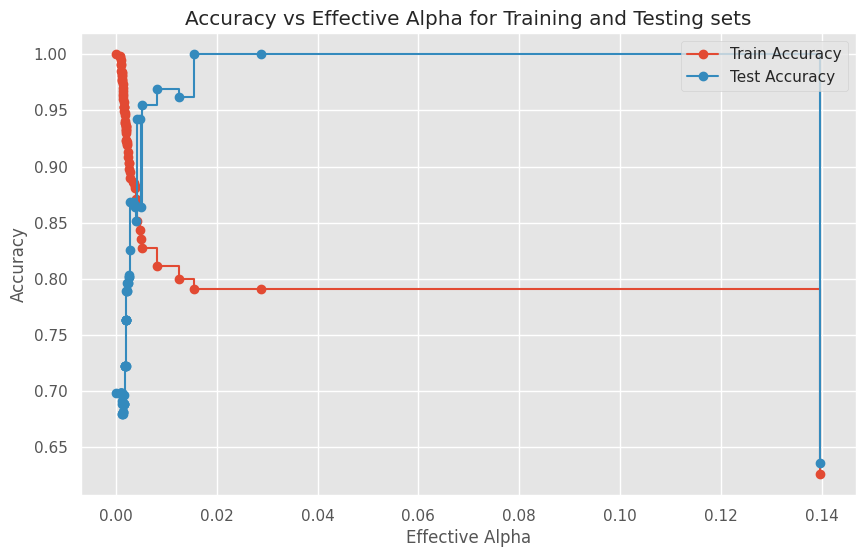

Best alpha: 0.01548675237833129
Final pruned model accuracy: 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Train a tree with minimal ccp_alpha to get effective alphas
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # array of effective alphas
impurities = path.impurities  # impurities at each node

# Step 2: Train multiple trees with different ccp_alpha values
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Step 3: Plot the accuracy vs alpha to visualize the best alpha
train_scores = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train Accuracy", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test Accuracy", drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Effective Alpha for Training and Testing sets")
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Choose the best alpha based on the plot or highest test accuracy
best_alpha_index = test_scores.index(max(test_scores))
best_ccp_alpha = ccp_alphas[best_alpha_index]
print(f"Best alpha: {best_ccp_alpha}")

# Step 5: Train final model with best ccp_alpha
final_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_ccp_alpha)
final_clf.fit(X_train, y_train)

# Evaluate the final model
y_pred = final_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final pruned model accuracy: {accuracy}")


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = final_clf.predict(X_test)

# Generate the classification report
print("Classification Report for Final Pruned Model:")
print(classification_report(y_test, y_pred))


Classification Report for Final Pruned Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



# **Generate a confusion matrix and analyze which groups (men, women, children) the model struggles to predict correctly**.


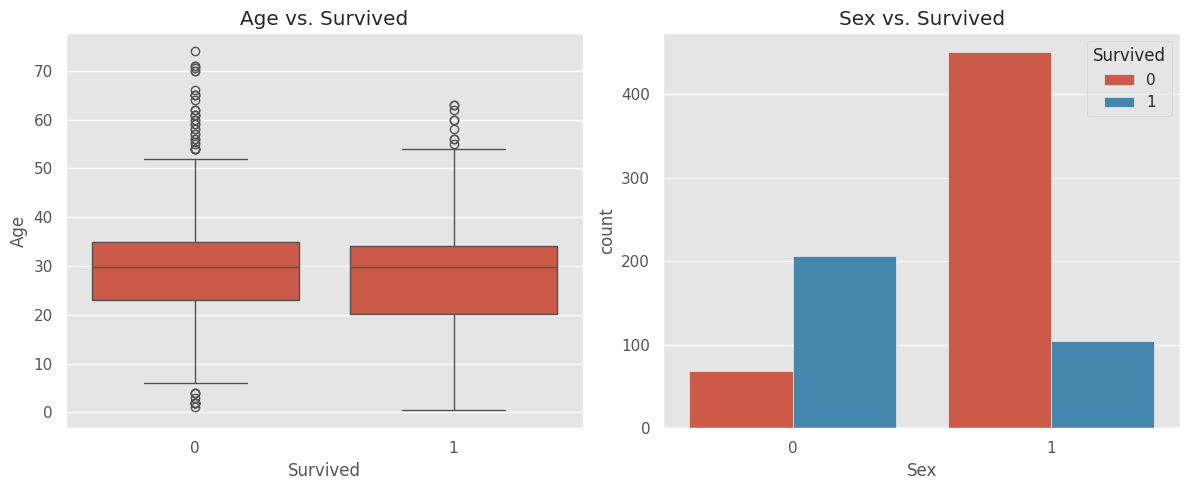

In [ ]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Survived', y='Age', data=train_df_without_outliers)
plt.title('Age vs. Survived')

plt.subplot(1, 2, 2)
sns.countplot(x='Sex', hue='Survived', data=train_df_without_outliers)
plt.title('Sex vs. Survived')

plt.tight_layout()
plt.show()

In [ ]:
# cross tab between survived and sex
pd.crosstab(train_df_without_outliers['Survived'], train_df_without_outliers['Sex'])


Sex,0,1
Survived,,
0,69,450
1,206,104


In [ ]:
child_survived = 0
# find the percentage of children surviveed
# Iterate through each row of the DataFrame
for index, row in train_df_without_outliers.iterrows():
    if row['Age'] < 18.0 :
        if row['Survived'] == 1:
            child_survived += 1

child_survived_percentage = (child_survived / len(train_df_without_outliers)) * 100


# calculating the percentage of survival of man and womrn
# Iterate through each row of the DataFrame
man_survived = 0
woman_survived = 0
for index, row in train_df_without_outliers.iterrows():
    if row['Sex'] == 1:
        if row['Survived'] == 1:
            man_survived += 1

    else:
        if row['Survived'] == 1:
            woman_survived += 1

man_survived_percentage = (man_survived / len(train_df_without_outliers)) * 100
woman_survived_percentage = (woman_survived / len(train_df_without_outliers)) * 100

print(f"Percentage of children survived: {child_survived_percentage:.2f}%")
print(f"Percentage of men survived: {man_survived_percentage:.2f}%")
print(f"Percentage of women survived: {woman_survived_percentage:.2f}%")

Percentage of children survived: 7.12%
Percentage of men survived: 12.55%
Percentage of women survived: 24.85%



# **Conclusion:**
Based on the graph titled "Model Accuracy vs. Tree Depth," the conclusion can be drawn as follows:

Tree Depth of 3: The model achieves the highest accuracy of 0.95 when the tree depth is 3. This suggests that a shallow decision tree is capable of capturing important patterns in the data.

Tree Depth of 4: As the tree depth increases to 4, the model's accuracy drops significantly to 0.84, indicating potential overfitting or that the model is unable to generalize well at this depth.

Tree Depth of 5: With a tree depth of 5, the model's accuracy recovers to 0.90, suggesting an improvement and indicating that some additional complexity is beneficial.

Tree Depth of 6: However, increasing the depth further to 6 causes the model's accuracy to drop sharply to 0.77, which may indicate overfitting or that the model is too complex for the dataset.

The model performs best at a tree depth of 3. Increasing the depth beyond this point generally leads to a decrease in accuracy, possibly due to overfitting. Therefore, for this specific dataset, a tree depth of 3 is the optimal choice for balancing accuracy and model complexity.